In [1]:
# Basic packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
from io import BytesIO
from zipfile import ZipFile
import urllib.request

# Import dataset

In [2]:
link='https://github.com/duonghung86/Fatality-crashes/raw/master/Codes/final%20data.zip'
url = urllib.request.urlopen(link)
with ZipFile(BytesIO(url.read())) as my_zip_file:
    for contained_file in my_zip_file.namelist():
        fzip=my_zip_file.open(contained_file)
        data=fzip.read()

s=str(data,'utf-8')
data = StringIO(s)
df=pd.read_csv(data)
print(df.shape)
df.head()

(488849, 151)


,Prsn_Injry_Sev_ID,Unit_Nbr,Prsn_Age,Toll_Road_Fl,Crash_Speed_Limit,Road_Constr_Zone_Fl,Road_Constr_Zone_Wrkr_Fl,At_Intrsct_Fl,Latitude,Longitude,...,Traffic_Cntl_ID_SIGNAL LIGHT WITH RED LIGHT RUNNING CAMERA,Traffic_Cntl_ID_STOP SIGN,Traffic_Cntl_ID_WARNING SIGN,Unit_Desc_ID_MOTOR VEHICLE,Unit_Desc_ID_MOTORIZED CONVEYANCE,Unit_Desc_ID_NON-CONTACT,Unit_Desc_ID_OTHER (EXPLAIN IN NARRATIVE),Unit_Desc_ID_PEDALCYCLIST,Unit_Desc_ID_PEDESTRIAN,Unit_Desc_ID_TOWED/PUSHED/TRAILER
0,0,1,48.0,0,35,0,0,0,30.660685,-93.893906,...,0,0,0,1,0,0,0,0,0,0
1,2,2,58.0,0,35,0,0,0,30.660685,-93.893906,...,0,0,0,1,0,0,0,0,0,0
2,0,1,68.0,0,45,0,0,1,33.203920,-96.596654,...,0,0,0,1,0,0,0,0,0,0
3,0,3,67.0,0,45,0,0,1,33.203920,-96.596654,...,0,0,0,1,0,0,0,0,0,0
4,0,1,36.0,0,35,0,0,1,29.792394,-95.746539,...,0,0,1,1,0,0,0,0,0,0


In [3]:
y=np.where(df['Prsn_Injry_Sev_ID']==4,1,0)
y

array([0, 0, 0, ..., 0, 0, 0])

In [4]:
neg, pos = np.bincount(y)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(total, pos, 100 * pos / total))

Examples:
    Total: 488849
    Positive: 1494 (0.31% of total)



In [5]:
X=df.iloc[:,1:].copy()
X

,Unit_Nbr,Prsn_Age,Toll_Road_Fl,Crash_Speed_Limit,Road_Constr_Zone_Fl,Road_Constr_Zone_Wrkr_Fl,At_Intrsct_Fl,Latitude,Longitude,Crash_month,...,Traffic_Cntl_ID_SIGNAL LIGHT WITH RED LIGHT RUNNING CAMERA,Traffic_Cntl_ID_STOP SIGN,Traffic_Cntl_ID_WARNING SIGN,Unit_Desc_ID_MOTOR VEHICLE,Unit_Desc_ID_MOTORIZED CONVEYANCE,Unit_Desc_ID_NON-CONTACT,Unit_Desc_ID_OTHER (EXPLAIN IN NARRATIVE),Unit_Desc_ID_PEDALCYCLIST,Unit_Desc_ID_PEDESTRIAN,Unit_Desc_ID_TOWED/PUSHED/TRAILER
0,1,48.0,0,35,0,0,0,30.660685,-93.893906,6,...,0,0,0,1,0,0,0,0,0,0
1,2,58.0,0,35,0,0,0,30.660685,-93.893906,6,...,0,0,0,1,0,0,0,0,0,0
2,1,68.0,0,45,0,0,1,33.203920,-96.596654,6,...,0,0,0,1,0,0,0,0,0,0
3,3,67.0,0,45,0,0,1,33.203920,-96.596654,6,...,0,0,0,1,0,0,0,0,0,0
4,1,36.0,0,35,0,0,1,29.792394,-95.746539,6,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488844,1,68.0,0,70,0,0,1,28.954878,-97.987513,11,...,0,0,0,1,0,0,0,0,0,0
488845,1,44.0,0,55,0,0,1,32.756880,-94.354907,11,...,0,1,0,1,0,0,0,0,0,0
488846,2,57.0,0,55,0,0,1,32.756880,-94.354907,11,...,0,1,0,1,0,0,0,0,0,0
488847,1,16.0,0,40,0,0,0,31.279209,-94.579816,9,...,0,1,0,1,0,0,0,0,0,0


# Split the dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=48)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train, random_state=48)

X_train=np.array(X_train)
X_test=np.array(X_test)
X_val=np.array(X_val)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training features shape: (312863, 150)
Validation features shape: (78216, 150)
Test features shape: (97770, 150)


In [8]:
y_train=np.array(y_train).reshape(len(y_train),1)
y_test=np.array(y_test).reshape(len(y_test),1)
y_val=np.array(y_val).reshape(len(y_val),1)

print('Training features shape:', y_train.shape)
print('Validation features shape:', y_val.shape)
print('Test features shape:', y_test.shape)

Training features shape: (312863, 1)
Validation features shape: (78216, 1)
Test features shape: (97770, 1)


In [9]:
# standardization
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# MLP simple

## Mini functions

### Create model

In [11]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.1.0


In [12]:
metrics = [keras.metrics.BinaryAccuracy(name='accuracy'),
          keras.metrics.Precision(name='precision'),
          keras.metrics.Recall(name='recall'),
          keras.metrics.AUC(name='auc')]

In [13]:
metrics = [keras.metrics.BinaryAccuracy(name='accuracy'),keras.metrics.AUC(name='auc')]

In [14]:
def create_model(nodes=20,actih='relu',actio='sigmoid',lr=1e-3,output_bias=None,logits=False):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        
    model = keras.Sequential()
    model.add(keras.layers.Dense(nodes, activation=actih,input_dim=X_train.shape[1]))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1, activation=actio,bias_initializer=output_bias))
    
    model.compile(optimizer=keras.optimizers.Adam(lr=lr),
                  loss=keras.losses.BinaryCrossentropy(from_logits=logits),
                  metrics=metrics)
    return model

### Show confusion matrix


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
def CI(arr):
    op=[arr[0,0],arr[1,1]]/arr.sum(axis=0)
    op=np.append(op,(arr[0,0]+arr[1,1])/arr.sum())
    op=pd.DataFrame(op,columns=['Precision'],index=['0','1','Global'])
    op['n_p']=np.append(arr.sum(axis=0),arr.sum())
    op['CI_p']=196*np.sqrt(op.Precision*(1-op.Precision)/op.n_p)
    op['Precision']=op.Precision*100

    op['Recall']=np.append([arr[0,0],arr[1,1]]/arr.sum(axis=1),(arr[0,0]+arr[1,1])/arr.sum())
    op['n_r']=np.append(arr.sum(axis=1),arr.sum())
    op['CI_r']=196*np.sqrt(op.Recall*(1-op.Recall)/op.n_r)
    op['Recall']=op.Recall*100
    return op

In [17]:
def show_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    print(cm)
    pcm=classification_report(labels, predictions > p, target_names=['Class 0','Class 1']) 
    print(pcm)
    return CI(cm)

### Plot ROC


In [18]:
from sklearn.metrics import roc_curve, auc

In [19]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name + ' (area = %0.2f)' % auc(fp, tp), linewidth=1.5, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([0,100.5])
  plt.ylim([0,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

In [20]:
data_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_train

<TensorSliceDataset shapes: ((150,), (1,)), types: (tf.float64, tf.int32)>

In [21]:
data_val = tf.data.Dataset.from_tensor_slices((X_val, y_val))
data_val

<TensorSliceDataset shapes: ((150,), (1,)), types: (tf.float64, tf.int32)>

In [22]:
initial_bias = np.log([pos/neg])
initial_bias

array([-5.78753572])

In [23]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [24]:
batch_size=2048
data_train = data_train.shuffle(len(X_train)).batch(batch_size)
data_val = data_val.shuffle(len(X_val)).batch(batch_size)

In [25]:
import time

### Initial weights

In [26]:
model = create_model(output_bias = initial_bias)
model.predict(X_train[:10])

array([[0.00311799],
       [0.00528466],
       [0.00103418],
       [0.00330786],
       [0.00358931],
       [0.00468287],
       [0.00480542],
       [0.00235316],
       [0.00308255],
       [0.00126995]], dtype=float32)

In [27]:
results = model.evaluate(X_train, y_train, batch_size=2048, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0297


In [28]:
import os
import tempfile

In [29]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [30]:
def create_model2(nodes=20,actih='relu',actio='sigmoid',lr=1e-3,logits=False):
    
    #output_bias = tf.keras.initializers.Constant(initial_bias)
    model = keras.Sequential()
    model.add(keras.layers.Dense(nodes, activation=actih,input_dim=X_train.shape[1]))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(1, activation=actio,bias_initializer=None))
    
    model.compile(optimizer=keras.optimizers.Adam(lr=lr),
                  loss=keras.losses.BinaryCrossentropy(from_logits=logits),
                  metrics=metrics)
    model.load_weights(initial_weights)
    return model

## Class weight

### Class weight estimation

In [31]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 163.60


### Run model with class weight

In [32]:
start_time=time.time()
wei_model=create_model2()
Monitor = wei_model.fit(data_train, epochs=100,callbacks=[es],validation_data = data_val,class_weight=class_weight, verbose = 1)
end_time=time.time()
end_time-start_time

Train for 153 steps, validate for 39 steps
Epoch 1/100
153/153 [==============================] - 7s 44ms/step - loss: 2.3056 - accuracy: 0.9838 - auc: 0.6387 - val_loss: 0.8367 - val_accuracy: 0.9775 - val_auc: 0.8948
Epoch 2/100
153/153 [==============================] - 4s 29ms/step - loss: 0.8647 - accuracy: 0.9277 - auc: 0.8421 - val_loss: 0.4974 - val_accuracy: 0.9348 - val_auc: 0.9242
Epoch 3/100
153/153 [==============================] - 4s 27ms/step - loss: 0.6746 - accuracy: 0.8992 - auc: 0.8798 - val_loss: 0.4269 - val_accuracy: 0.9175 - val_auc: 0.9337
Epoch 4/100
153/153 [==============================] - 5s 30ms/step - loss: 0.5645 - accuracy: 0.8951 - auc: 0.9021 - val_loss: 0.3811 - val_accuracy: 0.9232 - val_auc: 0.9417
Epoch 5/100
153/153 [==============================] - 4s 29ms/step - loss: 0.5087 - accuracy: 0.9041 - auc: 0.9163 - val_loss: 0.3494 - val_accuracy: 0.9238 - val_auc: 0.9482
Epoch 6/100
153/153 [==============================] - 4s 26ms/step - loss: 0

147.03937911987305

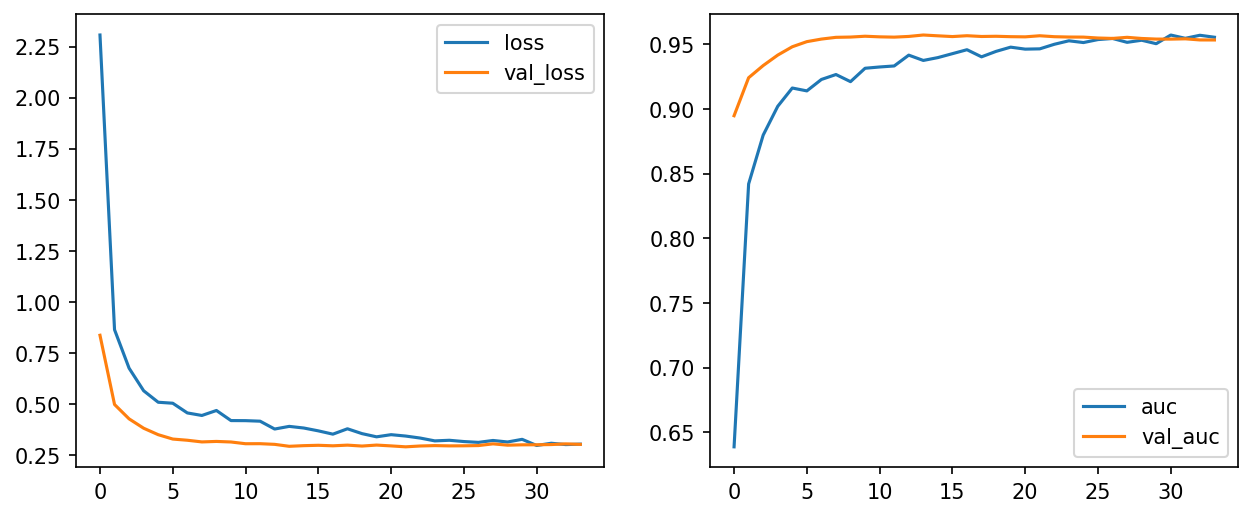

In [33]:
hist = pd.DataFrame(Monitor.history)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4),dpi=150)
hist[['loss','val_loss']].plot(ax=axes[0])
hist[['auc','val_auc']].plot(ax=axes[1])
plt.show()

### Result


In [34]:
y_pred_train_b = wei_model.predict(X_train)
y_pred_test_b = wei_model.predict(X_test)

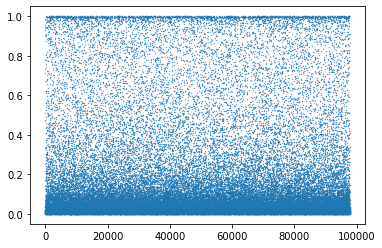

In [35]:
plt.scatter(np.arange(len(y_test)),y_pred_test_b,s=0.1)
plt.show()

In [36]:
show_cm(y_test,y_pred_test_b)

[[90137  7334]
 [   49   250]]
              precision    recall  f1-score   support

     Class 0       1.00      0.92      0.96     97471
     Class 1       0.03      0.84      0.06       299

    accuracy                           0.92     97770
   macro avg       0.52      0.88      0.51     97770
weighted avg       1.00      0.92      0.96     97770



,Precision,n_p,CI_p,Recall,n_r,CI_r
0,99.945668,90186,0.015209,92.475711,97471,0.165602
1,3.296414,7584,0.401836,83.612040,299,4.195825
Global,92.448604,97770,0.165622,92.448604,97770,0.165622


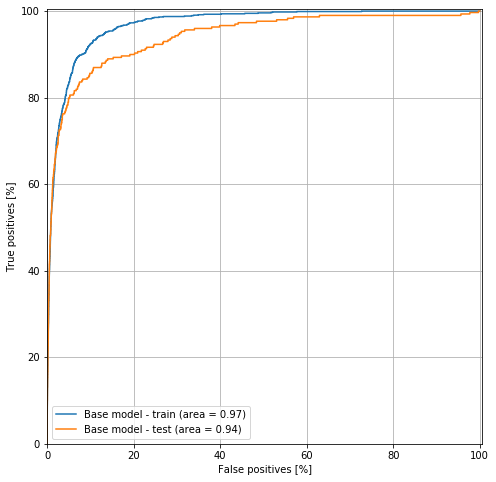

In [37]:
plt.figure(figsize=(8,8))
plot_roc('Base model - train',y_train,y_pred_train_b)
plot_roc('Base model - test',y_test,y_pred_test_b)
plt.legend()
plt.show()

# Tuning parameters


In [38]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [39]:
learning_rates = [0.1,0.01,0.001]
nodes = [5,10,20]
batches=[1024,2048,4096]
param_options = {'lr': learning_rates,'nodes': nodes,'batch_size':batches}     

In [43]:
scores={'BA':'balanced_accuracy','F1':'f1','AUC':'roc_auc'}

In [44]:
model= KerasClassifier(build_fn = create_model)
grid = GridSearchCV(estimator=model, 
                    param_grid=param_options,
                    scoring=scores,
                    refit='AUC'
                   )

start_time=time.time()

grid_result = grid.fit(X_train, y_train,
                       callbacks=[es],
                       epochs=100,
                       class_weight=class_weight,
                       validation_data = (X_val,y_val),verbose = 1)
end_time=time.time()
print('END')
print((end_time-start_time)/60)
print('minutes')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 5s 18us/sample - loss: 0.8452 - accuracy: 0.7886 - auc: 0.7495 - val_loss: 0.5297 - val_accuracy: 0.9134 - val_auc: 0.9129
Epoch 2/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.7459 - accuracy: 0.8690 - auc: 0.7861 - val_loss: 0.4284 - val_accuracy: 0.7571 - val_auc: 0.9427
Epoch 3/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.6300 - accuracy: 0.7725 - auc: 0.8281 - val_loss: 0.6482 - val_accuracy: 0.9247 - val_auc: 0.8818
Epoch 4/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.8527 - accuracy: 0.5081 - auc: 0.7672 - val_loss: 1.1277 - val_accuracy: 0.5877 - val_auc: 0.7809
Epoch 5/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.1729 - accuracy: 0.4101 - auc: 0.6856 - val_loss: 1.2473 - val_accuracy: 0.5651 -

250290/250290 [==============================] - 3s 12us/sample - loss: 0.5291 - accuracy: 0.4290 - auc: 0.7105 - val_loss: 1.0864 - val_accuracy: 0.6344 - val_auc: 0.8071
Epoch 21/100
250290/250290 [==============================] - 3s 11us/sample - loss: 0.5246 - accuracy: 0.4499 - auc: 0.7280 - val_loss: 1.0269 - val_accuracy: 0.6656 - val_auc: 0.8217
Epoch 00021: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 5s 18us/sample - loss: 1.0937 - accuracy: 0.7339 - auc: 0.7194 - val_loss: 0.6832 - val_accuracy: 0.8986 - val_auc: 0.8781
Epoch 2/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.7267 - accuracy: 0.7103 - auc: 0.7860 - val_loss: 0.6044 - val_accuracy: 0.9060 - val_auc: 0.9206
Epoch 3/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5209 - accuracy: 0.6938 - auc: 0.8426 - val_loss: 0.4876 - val

250291/250291 [==============================] - 2s 8us/sample - loss: 0.6572 - accuracy: 0.5479 - auc: 0.7664 - val_loss: 1.1731 - val_accuracy: 0.6978 - val_auc: 0.8289
Epoch 16/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.5525 - accuracy: 0.5367 - auc: 0.7634 - val_loss: 0.8726 - val_accuracy: 0.6842 - val_auc: 0.8278
Epoch 17/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.6519 - accuracy: 0.5201 - auc: 0.7503 - val_loss: 0.9781 - val_accuracy: 0.6617 - val_auc: 0.8174
Epoch 18/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.4857 - accuracy: 0.5269 - auc: 0.7613 - val_loss: 1.0278 - val_accuracy: 0.6707 - val_auc: 0.8176
Epoch 19/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.5503 - accuracy: 0.5328 - auc: 0.7616 - val_loss: 1.3067 - val_accuracy: 0.6631 - val_auc: 0.8075
Epoch 20/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.8246 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.7110 - accuracy: 0.5232 - auc: 0.7656 - val_loss: 1.1151 - val_accuracy: 0.6527 - val_auc: 0.8089
Epoch 8/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.6015 - accuracy: 0.5306 - auc: 0.7637 - val_loss: 0.7552 - val_accuracy: 0.6847 - val_auc: 0.8324
Epoch 9/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.7824 - accuracy: 0.5526 - auc: 0.7601 - val_loss: 1.3759 - val_accuracy: 0.7145 - val_auc: 0.8306
Epoch 10/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.7360 - accuracy: 0.5341 - auc: 0.7583 - val_loss: 1.3873 - val_accuracy: 0.6908 - val_auc: 0.8304
Epoch 11/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5587 - accuracy: 0.5352 - auc: 0.7685 - val_loss: 1.5595 - val_accuracy: 0.6725 - val_auc: 0.8135
Epoch 12/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.6423 - ac

250290/250290 [==============================] - 2s 10us/sample - loss: 0.9631 - accuracy: 0.4870 - auc: 0.7206 - val_loss: 0.9744 - val_accuracy: 0.9507 - val_auc: 0.8276
Epoch 6/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.9279 - accuracy: 0.4506 - auc: 0.7061 - val_loss: 1.0941 - val_accuracy: 0.5272 - val_auc: 0.7468
Epoch 7/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.9631 - accuracy: 0.4092 - auc: 0.6859 - val_loss: 1.1795 - val_accuracy: 0.6040 - val_auc: 0.7899
Epoch 8/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.7023 - accuracy: 0.4626 - auc: 0.7062 - val_loss: 0.8766 - val_accuracy: 0.6059 - val_auc: 0.7983
Epoch 9/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5518 - accuracy: 0.4685 - auc: 0.7338 - val_loss: 1.1535 - val_accuracy: 0.6391 - val_auc: 0.8133
Epoch 10/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5841 - acc

250291/250291 [==============================] - 2s 9us/sample - loss: 0.5566 - accuracy: 0.4069 - auc: 0.6988 - val_loss: 1.2506 - val_accuracy: 0.5461 - val_auc: 0.7697
Epoch 00023: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 4s 16us/sample - loss: 1.4603 - accuracy: 0.7660 - auc: 0.7524 - val_loss: 1.4064 - val_accuracy: 0.5886 - val_auc: 0.7508
Epoch 2/100
250291/250291 [==============================] - 2s 8us/sample - loss: 1.2020 - accuracy: 0.8507 - auc: 0.8250 - val_loss: 0.6553 - val_accuracy: 0.8415 - val_auc: 0.9091
Epoch 3/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.9207 - accuracy: 0.8972 - auc: 0.8024 - val_loss: 0.7434 - val_accuracy: 0.9292 - val_auc: 0.9076
Epoch 4/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.9004 - accuracy: 0.7477 - auc: 0.8013 - val_loss: 1.4582 - val_ac

250290/250290 [==============================] - 2s 9us/sample - loss: 1.9288 - accuracy: 0.4113 - auc: 0.7045 - val_loss: 2.5497 - val_accuracy: 0.5822 - val_auc: 0.8200
Epoch 16/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.0586 - accuracy: 0.4520 - auc: 0.7693 - val_loss: 2.8300 - val_accuracy: 0.5800 - val_auc: 0.8909
Epoch 17/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.8349 - accuracy: 0.5168 - auc: 0.7671 - val_loss: 3.0390 - val_accuracy: 0.5779 - val_auc: 0.8986
Epoch 18/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.9757 - accuracy: 0.4597 - auc: 0.7664 - val_loss: 1.8724 - val_accuracy: 0.5836 - val_auc: 0.8175
Epoch 19/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.6720 - accuracy: 0.4277 - auc: 0.7557 - val_loss: 1.7642 - val_accuracy: 0.6222 - val_auc: 0.8494
Epoch 20/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.5602 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.6519 - accuracy: 0.4909 - auc: 0.7821 - val_loss: 2.1077 - val_accuracy: 0.6241 - val_auc: 0.8737
Epoch 12/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.7013 - accuracy: 0.4877 - auc: 0.7639 - val_loss: 2.0454 - val_accuracy: 0.6027 - val_auc: 0.7928
Epoch 13/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.6851 - accuracy: 0.4295 - auc: 0.6973 - val_loss: 5.2032 - val_accuracy: 0.5609 - val_auc: 0.7693
Epoch 14/100
250290/250290 [==============================] - 2s 9us/sample - loss: 3.2700 - accuracy: 0.4057 - auc: 0.6674 - val_loss: 5.1241 - val_accuracy: 0.5331 - val_auc: 0.7473
Epoch 15/100
250290/250290 [==============================] - 2s 9us/sample - loss: 1.2775 - accuracy: 0.3886 - auc: 0.6836 - val_loss: 3.8184 - val_accuracy: 0.5206 - val_auc: 0.7461
Epoch 16/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.9344 - 

250291/250291 [==============================] - 2s 9us/sample - loss: 2.7866 - accuracy: 0.8246 - auc: 0.8209 - val_loss: 2.5299 - val_accuracy: 0.5758 - val_auc: 0.7554
Epoch 4/100
250291/250291 [==============================] - 2s 9us/sample - loss: 2.1823 - accuracy: 0.8513 - auc: 0.7749 - val_loss: 1.4502 - val_accuracy: 0.9248 - val_auc: 0.9064
Epoch 5/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.9634 - accuracy: 0.8014 - auc: 0.7974 - val_loss: 2.5181 - val_accuracy: 0.9004 - val_auc: 0.8812
Epoch 6/100
250291/250291 [==============================] - 2s 9us/sample - loss: 2.6837 - accuracy: 0.6619 - auc: 0.7688 - val_loss: 1.6671 - val_accuracy: 0.9371 - val_auc: 0.8726
Epoch 7/100
250291/250291 [==============================] - 2s 9us/sample - loss: 1.8205 - accuracy: 0.7000 - auc: 0.7760 - val_loss: 2.2943 - val_accuracy: 0.9302 - val_auc: 0.8827
Epoch 8/100
250291/250291 [==============================] - 2s 9us/sample - loss: 2.9782 - accur

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3415 - accuracy: 0.7770 - auc: 0.9181 - val_loss: 0.2898 - val_accuracy: 0.8391 - val_auc: 0.9564
Epoch 18/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3232 - accuracy: 0.7771 - auc: 0.9235 - val_loss: 0.2946 - val_accuracy: 0.8860 - val_auc: 0.9554
Epoch 19/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3370 - accuracy: 0.7804 - auc: 0.9201 - val_loss: 0.2901 - val_accuracy: 0.8729 - val_auc: 0.9566
Epoch 20/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3506 - accuracy: 0.7717 - auc: 0.9165 - val_loss: 0.2842 - val_accuracy: 0.8359 - val_auc: 0.9548
Epoch 21/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3266 - accuracy: 0.7772 - auc: 0.9210 - val_loss: 0.3066 - val_accuracy: 0.8515 - val_auc: 0.9552
Epoch 22/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3421 - 

  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 5s 20us/sample - loss: 0.5238 - accuracy: 0.8792 - auc: 0.8097 - val_loss: 0.3325 - val_accuracy: 0.9000 - val_auc: 0.9470
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.4272 - accuracy: 0.8936 - auc: 0.8785 - val_loss: 0.3005 - val_accuracy: 0.8907 - val_auc: 0.9556
Epoch 3/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3902 - accuracy: 0.8986 - auc: 0.8954 - val_loss: 0.2802 - val_accuracy: 0.8937 - val_auc: 0.9585
Epoch 4/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3933 - accuracy: 0.8831 - auc: 0.8966 - val_loss: 0.2725 - val_accuracy: 0.8774 - val_auc: 0.9573
Epoch 5/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3723 - accuracy: 0.8798 - auc: 0.9054 - val_loss: 0.2851 - val_accuracy: 0.8595 - val_auc: 0.9568
Epoch 6/

Epoch 20/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3313 - accuracy: 0.9288 - auc: 0.9288 - val_loss: 0.2924 - val_accuracy: 0.9198 - val_auc: 0.9523
Epoch 21/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3446 - accuracy: 0.9316 - auc: 0.9256 - val_loss: 0.2899 - val_accuracy: 0.9243 - val_auc: 0.9530
Epoch 22/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3427 - accuracy: 0.9288 - auc: 0.9254 - val_loss: 0.2945 - val_accuracy: 0.9177 - val_auc: 0.9529
Epoch 23/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3407 - accuracy: 0.9300 - auc: 0.9260 - val_loss: 0.2841 - val_accuracy: 0.9303 - val_auc: 0.9543
Epoch 24/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3424 - accuracy: 0.9286 - auc: 0.9297 - val_loss: 0.2900 - val_accuracy: 0.9280 - val_auc: 0.9528
Epoch 25/100
250291/250291 [==============================] - 2s 8us/sample - lo

250290/250290 [==============================] - 2s 9us/sample - loss: 0.3186 - accuracy: 0.8445 - auc: 0.9412 - val_loss: 0.2744 - val_accuracy: 0.9025 - val_auc: 0.9572
Epoch 5/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3159 - accuracy: 0.8758 - auc: 0.9442 - val_loss: 0.2694 - val_accuracy: 0.8957 - val_auc: 0.9567
Epoch 6/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3074 - accuracy: 0.8661 - auc: 0.9465 - val_loss: 0.2594 - val_accuracy: 0.8791 - val_auc: 0.9596
Epoch 7/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2985 - accuracy: 0.8638 - auc: 0.9488 - val_loss: 0.2650 - val_accuracy: 0.8948 - val_auc: 0.9581
Epoch 8/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2939 - accuracy: 0.8598 - auc: 0.9496 - val_loss: 0.2791 - val_accuracy: 0.8996 - val_auc: 0.9574
Epoch 9/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2945 - accur

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2611 - accuracy: 0.9040 - auc: 0.9590 - val_loss: 0.4256 - val_accuracy: 0.9078 - val_auc: 0.9432
Epoch 21/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2637 - accuracy: 0.9065 - auc: 0.9591 - val_loss: 0.4418 - val_accuracy: 0.9089 - val_auc: 0.9379
Epoch 22/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2549 - accuracy: 0.9061 - auc: 0.9610 - val_loss: 0.4480 - val_accuracy: 0.9173 - val_auc: 0.9391
Epoch 23/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2526 - accuracy: 0.9089 - auc: 0.9630 - val_loss: 0.4695 - val_accuracy: 0.9305 - val_auc: 0.9403
Epoch 24/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2503 - accuracy: 0.9082 - auc: 0.9606 - val_loss: 0.5177 - val_accuracy: 0.9147 - val_auc: 0.9388
Epoch 00024: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290

250291/250291 [==============================] - 2s 8us/sample - loss: 0.2857 - accuracy: 0.9211 - auc: 0.9581 - val_loss: 0.3148 - val_accuracy: 0.9290 - val_auc: 0.9477
Epoch 14/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2941 - accuracy: 0.9227 - auc: 0.9514 - val_loss: 0.3397 - val_accuracy: 0.8956 - val_auc: 0.9461
Epoch 15/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2844 - accuracy: 0.9219 - auc: 0.9550 - val_loss: 0.3393 - val_accuracy: 0.9444 - val_auc: 0.9458
Epoch 16/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2942 - accuracy: 0.9226 - auc: 0.9531 - val_loss: 0.3223 - val_accuracy: 0.9105 - val_auc: 0.9464
Epoch 17/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2722 - accuracy: 0.9213 - auc: 0.9604 - val_loss: 0.3460 - val_accuracy: 0.9203 - val_auc: 0.9435
Epoch 18/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2796 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2992 - accuracy: 0.9137 - auc: 0.9524 - val_loss: 0.2887 - val_accuracy: 0.9066 - val_auc: 0.9514
Epoch 6/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3202 - accuracy: 0.9026 - auc: 0.9493 - val_loss: 0.2858 - val_accuracy: 0.9170 - val_auc: 0.9524
Epoch 7/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2939 - accuracy: 0.9113 - auc: 0.9531 - val_loss: 0.2688 - val_accuracy: 0.9187 - val_auc: 0.9563
Epoch 8/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2948 - accuracy: 0.9092 - auc: 0.9541 - val_loss: 0.2735 - val_accuracy: 0.9203 - val_auc: 0.9566
Epoch 9/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2943 - accuracy: 0.9127 - auc: 0.9539 - val_loss: 0.2683 - val_accuracy: 0.9070 - val_auc: 0.9576
Epoch 10/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2740 - accu

Epoch 00025: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 5s 21us/sample - loss: 0.5658 - accuracy: 0.7380 - auc: 0.8668 - val_loss: 0.3145 - val_accuracy: 0.7964 - val_auc: 0.9557
Epoch 2/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3702 - accuracy: 0.8500 - auc: 0.9264 - val_loss: 0.2782 - val_accuracy: 0.8987 - val_auc: 0.9585
Epoch 3/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3164 - accuracy: 0.8964 - auc: 0.9438 - val_loss: 0.2744 - val_accuracy: 0.8862 - val_auc: 0.9570
Epoch 4/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3133 - accuracy: 0.8936 - auc: 0.9459 - val_loss: 0.2638 - val_accuracy: 0.8994 - val_auc: 0.9591
Epoch 5/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3046 - accuracy: 0.8958 - auc: 0.9474 - val_loss: 0.2

250291/250291 [==============================] - 2s 9us/sample - loss: 0.2555 - accuracy: 0.9217 - auc: 0.9633 - val_loss: 0.3248 - val_accuracy: 0.9285 - val_auc: 0.9480
Epoch 19/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.2603 - accuracy: 0.9188 - auc: 0.9621 - val_loss: 0.3494 - val_accuracy: 0.9203 - val_auc: 0.9459
Epoch 20/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2671 - accuracy: 0.9172 - auc: 0.9609 - val_loss: 0.3505 - val_accuracy: 0.9262 - val_auc: 0.9452
Epoch 21/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2678 - accuracy: 0.9192 - auc: 0.9608 - val_loss: 0.3810 - val_accuracy: 0.9238 - val_auc: 0.9448
Epoch 22/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2632 - accuracy: 0.9158 - auc: 0.9619 - val_loss: 0.3589 - val_accuracy: 0.9166 - val_auc: 0.9459
Epoch 23/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2601 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3706 - accuracy: 0.7630 - auc: 0.9078 - val_loss: 0.2855 - val_accuracy: 0.8709 - val_auc: 0.9562
Epoch 11/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3693 - accuracy: 0.7642 - auc: 0.9058 - val_loss: 0.2847 - val_accuracy: 0.8712 - val_auc: 0.9570
Epoch 12/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3464 - accuracy: 0.7715 - auc: 0.9149 - val_loss: 0.2815 - val_accuracy: 0.8783 - val_auc: 0.9574
Epoch 13/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3520 - accuracy: 0.7747 - auc: 0.9137 - val_loss: 0.2795 - val_accuracy: 0.8775 - val_auc: 0.9572
Epoch 14/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3556 - accuracy: 0.7767 - auc: 0.9126 - val_loss: 0.2830 - val_accuracy: 0.8742 - val_auc: 0.9565
Epoch 15/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3411 - 

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3515 - accuracy: 0.9102 - auc: 0.9146 - val_loss: 0.2777 - val_accuracy: 0.9005 - val_auc: 0.9556
Epoch 21/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3464 - accuracy: 0.9101 - auc: 0.9183 - val_loss: 0.2814 - val_accuracy: 0.9010 - val_auc: 0.9550
Epoch 22/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3480 - accuracy: 0.9106 - auc: 0.9161 - val_loss: 0.2821 - val_accuracy: 0.8992 - val_auc: 0.9546
Epoch 23/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3503 - accuracy: 0.9106 - auc: 0.9163 - val_loss: 0.2881 - val_accuracy: 0.9060 - val_auc: 0.9535
Epoch 24/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3307 - accuracy: 0.9121 - auc: 0.9260 - val_loss: 0.2808 - val_accuracy: 0.8950 - val_auc: 0.9550
Epoch 25/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3316 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.3451 - accuracy: 0.9249 - auc: 0.9249 - val_loss: 0.2899 - val_accuracy: 0.9263 - val_auc: 0.9552
Epoch 26/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3346 - accuracy: 0.9259 - auc: 0.9345 - val_loss: 0.2928 - val_accuracy: 0.9232 - val_auc: 0.9547
Epoch 27/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3394 - accuracy: 0.9242 - auc: 0.9326 - val_loss: 0.2902 - val_accuracy: 0.9276 - val_auc: 0.9553
Epoch 28/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3283 - accuracy: 0.9279 - auc: 0.9363 - val_loss: 0.2948 - val_accuracy: 0.9265 - val_auc: 0.9539
Epoch 29/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3396 - accuracy: 0.9260 - auc: 0.9324 - val_loss: 0.2979 - val_accuracy: 0.9222 - val_auc: 0.9539
Epoch 30/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.3348 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3246 - accuracy: 0.7301 - auc: 0.9272 - val_loss: 0.3031 - val_accuracy: 0.8760 - val_auc: 0.9510
Epoch 33/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3317 - accuracy: 0.7290 - auc: 0.9263 - val_loss: 0.3012 - val_accuracy: 0.8712 - val_auc: 0.9512
Epoch 34/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3122 - accuracy: 0.7275 - auc: 0.9292 - val_loss: 0.2980 - val_accuracy: 0.8794 - val_auc: 0.9510
Epoch 35/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3231 - accuracy: 0.7290 - auc: 0.9283 - val_loss: 0.3007 - val_accuracy: 0.8745 - val_auc: 0.9507
Epoch 36/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3189 - accuracy: 0.7276 - auc: 0.9303 - val_loss: 0.3028 - val_accuracy: 0.8759 - val_auc: 0.9513
Epoch 37/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3151 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3161 - accuracy: 0.9182 - auc: 0.9362 - val_loss: 0.3078 - val_accuracy: 0.9186 - val_auc: 0.9499
Epoch 32/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3153 - accuracy: 0.9181 - auc: 0.9354 - val_loss: 0.3116 - val_accuracy: 0.9161 - val_auc: 0.9496
Epoch 00032: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 17us/sample - loss: 0.7782 - accuracy: 0.8168 - auc: 0.7364 - val_loss: 0.4047 - val_accuracy: 0.8597 - val_auc: 0.9127
Epoch 2/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.5179 - accuracy: 0.8469 - auc: 0.8556 - val_loss: 0.3524 - val_accuracy: 0.8881 - val_auc: 0.9335
Epoch 3/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.4547 - accuracy: 0.8787 - auc: 0.8941 - val_loss: 0.3233 - val_a

250290/250290 [==============================] - 2s 8us/sample - loss: 0.3246 - accuracy: 0.8944 - auc: 0.9390 - val_loss: 0.2744 - val_accuracy: 0.9038 - val_auc: 0.9548
Epoch 9/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2999 - accuracy: 0.8959 - auc: 0.9486 - val_loss: 0.2725 - val_accuracy: 0.9048 - val_auc: 0.9551
Epoch 10/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.3062 - accuracy: 0.8978 - auc: 0.9451 - val_loss: 0.2719 - val_accuracy: 0.9050 - val_auc: 0.9551
Epoch 11/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2911 - accuracy: 0.9008 - auc: 0.9506 - val_loss: 0.2738 - val_accuracy: 0.9082 - val_auc: 0.9551
Epoch 12/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2877 - accuracy: 0.9007 - auc: 0.9516 - val_loss: 0.2760 - val_accuracy: 0.9101 - val_auc: 0.9549
Epoch 13/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2889 - a

250290/250290 [==============================] - 2s 8us/sample - loss: 0.2613 - accuracy: 0.8517 - auc: 0.9584 - val_loss: 0.2819 - val_accuracy: 0.9017 - val_auc: 0.9560
Epoch 21/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2606 - accuracy: 0.8514 - auc: 0.9591 - val_loss: 0.2874 - val_accuracy: 0.8990 - val_auc: 0.9544
Epoch 22/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2621 - accuracy: 0.8472 - auc: 0.9573 - val_loss: 0.2943 - val_accuracy: 0.9028 - val_auc: 0.9537
Epoch 23/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2675 - accuracy: 0.8516 - auc: 0.9561 - val_loss: 0.3012 - val_accuracy: 0.9002 - val_auc: 0.9515
Epoch 24/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2655 - accuracy: 0.8459 - auc: 0.9564 - val_loss: 0.2977 - val_accuracy: 0.8979 - val_auc: 0.9524
Epoch 25/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2545 - 

Epoch 00032: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 4s 17us/sample - loss: 0.7931 - accuracy: 0.2961 - auc: 0.7484 - val_loss: 0.4594 - val_accuracy: 0.5795 - val_auc: 0.9267
Epoch 2/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.5130 - accuracy: 0.6170 - auc: 0.8776 - val_loss: 0.3448 - val_accuracy: 0.8273 - val_auc: 0.9437
Epoch 3/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.4321 - accuracy: 0.7268 - auc: 0.9068 - val_loss: 0.3025 - val_accuracy: 0.8629 - val_auc: 0.9511
Epoch 4/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3732 - accuracy: 0.7654 - auc: 0.9257 - val_loss: 0.2817 - val_accuracy: 0.8803 - val_auc: 0.9543
Epoch 5/100
250291/250291 [==============================] - 2s 9us/sample - loss: 0.3582 - accuracy: 0.7834 - auc: 0.9310 - val_loss: 0.2

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2639 - accuracy: 0.8771 - auc: 0.9589 - val_loss: 0.2547 - val_accuracy: 0.9058 - val_auc: 0.9605
Epoch 11/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2503 - accuracy: 0.8795 - auc: 0.9626 - val_loss: 0.2576 - val_accuracy: 0.9046 - val_auc: 0.9599
Epoch 12/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2516 - accuracy: 0.8800 - auc: 0.9627 - val_loss: 0.2585 - val_accuracy: 0.9079 - val_auc: 0.9600
Epoch 13/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2402 - accuracy: 0.8843 - auc: 0.9652 - val_loss: 0.2555 - val_accuracy: 0.9036 - val_auc: 0.9610
Epoch 14/100
250290/250290 [==============================] - 2s 8us/sample - loss: 0.2454 - accuracy: 0.8836 - auc: 0.9638 - val_loss: 0.2568 - val_accuracy: 0.9088 - val_auc: 0.9612
Epoch 15/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2418 - 

250290/250290 [==============================] - 2s 9us/sample - loss: 0.2329 - accuracy: 0.9041 - auc: 0.9671 - val_loss: 0.3036 - val_accuracy: 0.9130 - val_auc: 0.9517
Epoch 19/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2163 - accuracy: 0.9038 - auc: 0.9713 - val_loss: 0.3143 - val_accuracy: 0.9240 - val_auc: 0.9517
Epoch 20/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2359 - accuracy: 0.9066 - auc: 0.9662 - val_loss: 0.3121 - val_accuracy: 0.9176 - val_auc: 0.9519
Epoch 21/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2255 - accuracy: 0.9063 - auc: 0.9691 - val_loss: 0.3189 - val_accuracy: 0.9182 - val_auc: 0.9507
Epoch 22/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2214 - accuracy: 0.9073 - auc: 0.9701 - val_loss: 0.3225 - val_accuracy: 0.9185 - val_auc: 0.9515
Epoch 23/100
250290/250290 [==============================] - 2s 9us/sample - loss: 0.2146 - 

250291/250291 [==============================] - 2s 8us/sample - loss: 0.3714 - accuracy: 0.8304 - auc: 0.9208 - val_loss: 0.3131 - val_accuracy: 0.8911 - val_auc: 0.9404
Epoch 4/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3428 - accuracy: 0.8507 - auc: 0.9328 - val_loss: 0.2951 - val_accuracy: 0.8967 - val_auc: 0.9467
Epoch 5/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3133 - accuracy: 0.8702 - auc: 0.9434 - val_loss: 0.2909 - val_accuracy: 0.9057 - val_auc: 0.9474
Epoch 6/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.3012 - accuracy: 0.8794 - auc: 0.9457 - val_loss: 0.2892 - val_accuracy: 0.8976 - val_auc: 0.9487
Epoch 7/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2828 - accuracy: 0.8807 - auc: 0.9526 - val_loss: 0.2849 - val_accuracy: 0.9045 - val_auc: 0.9500
Epoch 8/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2726 - accur

250291/250291 [==============================] - 2s 8us/sample - loss: 0.2601 - accuracy: 0.9121 - auc: 0.9613 - val_loss: 0.2821 - val_accuracy: 0.9149 - val_auc: 0.9531
Epoch 14/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2641 - accuracy: 0.9106 - auc: 0.9606 - val_loss: 0.2855 - val_accuracy: 0.9204 - val_auc: 0.9528
Epoch 15/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2516 - accuracy: 0.9134 - auc: 0.9638 - val_loss: 0.2926 - val_accuracy: 0.9206 - val_auc: 0.9522
Epoch 16/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2437 - accuracy: 0.9133 - auc: 0.9660 - val_loss: 0.2908 - val_accuracy: 0.9170 - val_auc: 0.9518
Epoch 17/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2472 - accuracy: 0.9147 - auc: 0.9647 - val_loss: 0.2956 - val_accuracy: 0.9211 - val_auc: 0.9501
Epoch 18/100
250291/250291 [==============================] - 2s 8us/sample - loss: 0.2433 - 

250290/250290 [==============================] - 2s 6us/sample - loss: 0.5086 - accuracy: 0.4723 - auc: 0.7319 - val_loss: 0.7059 - val_accuracy: 0.6619 - val_auc: 0.8227
Epoch 00025: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 14us/sample - loss: 0.6464 - accuracy: 0.8257 - auc: 0.7442 - val_loss: 0.4178 - val_accuracy: 0.9245 - val_auc: 0.9320
Epoch 2/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.6910 - accuracy: 0.7136 - auc: 0.7570 - val_loss: 0.4329 - val_accuracy: 0.8550 - val_auc: 0.8995
Epoch 3/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.6864 - accuracy: 0.6150 - auc: 0.7816 - val_loss: 0.4313 - val_accuracy: 0.6839 - val_auc: 0.9316
Epoch 4/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.5519 - accuracy: 0.5656 - auc: 0.8194 - val_loss: 0.4597 - val_ac

250290/250290 [==============================] - 2s 6us/sample - loss: 0.4214 - accuracy: 0.5416 - auc: 0.8411 - val_loss: 0.4904 - val_accuracy: 0.7238 - val_auc: 0.9267
Epoch 17/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4321 - accuracy: 0.5483 - auc: 0.8418 - val_loss: 0.3634 - val_accuracy: 0.7398 - val_auc: 0.9404
Epoch 18/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4384 - accuracy: 0.6408 - auc: 0.8682 - val_loss: 0.4675 - val_accuracy: 0.7229 - val_auc: 0.9391
Epoch 19/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4457 - accuracy: 0.6080 - auc: 0.8540 - val_loss: 0.5340 - val_accuracy: 0.7184 - val_auc: 0.9256
Epoch 20/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4733 - accuracy: 0.5454 - auc: 0.8436 - val_loss: 0.7232 - val_accuracy: 0.7157 - val_auc: 0.9350
Epoch 21/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4513 - 

250291/250291 [==============================] - 2s 6us/sample - loss: 0.4925 - accuracy: 0.4963 - auc: 0.7937 - val_loss: 0.6278 - val_accuracy: 0.6676 - val_auc: 0.8491
Epoch 26/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.4738 - accuracy: 0.4774 - auc: 0.7756 - val_loss: 0.5978 - val_accuracy: 0.6889 - val_auc: 0.8758
Epoch 27/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.4553 - accuracy: 0.4803 - auc: 0.8093 - val_loss: 0.5672 - val_accuracy: 0.6955 - val_auc: 0.9226
Epoch 00027: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 3s 14us/sample - loss: 0.7079 - accuracy: 0.8368 - auc: 0.7518 - val_loss: 0.3782 - val_accuracy: 0.9409 - val_auc: 0.9280
Epoch 2/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.6045 - accuracy: 0.8504 - auc: 0.8004 - val_loss: 0.5012 - val_

250290/250290 [==============================] - 2s 6us/sample - loss: 0.5021 - accuracy: 0.5518 - auc: 0.8420 - val_loss: 0.4717 - val_accuracy: 0.6710 - val_auc: 0.9361
Epoch 16/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4772 - accuracy: 0.5210 - auc: 0.8101 - val_loss: 0.6161 - val_accuracy: 0.6705 - val_auc: 0.8673
Epoch 17/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4524 - accuracy: 0.5353 - auc: 0.8110 - val_loss: 0.5847 - val_accuracy: 0.6818 - val_auc: 0.9025
Epoch 18/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.5949 - accuracy: 0.5358 - auc: 0.8263 - val_loss: 0.7344 - val_accuracy: 0.6857 - val_auc: 0.9198
Epoch 19/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4661 - accuracy: 0.5188 - auc: 0.8356 - val_loss: 0.7927 - val_accuracy: 0.6565 - val_auc: 0.8523
Epoch 20/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.5156 - 

250290/250290 [==============================] - 2s 6us/sample - loss: 0.4326 - accuracy: 0.6244 - auc: 0.8413 - val_loss: 0.9497 - val_accuracy: 0.7580 - val_auc: 0.9207
Epoch 25/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4070 - accuracy: 0.6303 - auc: 0.8581 - val_loss: 1.0493 - val_accuracy: 0.7508 - val_auc: 0.9184
Epoch 26/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4350 - accuracy: 0.6162 - auc: 0.8566 - val_loss: 1.2306 - val_accuracy: 0.7381 - val_auc: 0.9285
Epoch 27/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4069 - accuracy: 0.6113 - auc: 0.8566 - val_loss: 1.0558 - val_accuracy: 0.7322 - val_auc: 0.9125
Epoch 28/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4326 - accuracy: 0.5990 - auc: 0.8426 - val_loss: 1.1865 - val_accuracy: 0.7262 - val_auc: 0.8708
Epoch 29/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.4996 - 

250291/250291 [==============================] - 2s 7us/sample - loss: 1.6338 - accuracy: 0.5727 - auc: 0.7417 - val_loss: 2.5073 - val_accuracy: 0.6642 - val_auc: 0.8132
Epoch 12/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.7377 - accuracy: 0.5216 - auc: 0.7617 - val_loss: 1.9218 - val_accuracy: 0.6506 - val_auc: 0.8105
Epoch 13/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.5318 - accuracy: 0.5457 - auc: 0.7651 - val_loss: 1.0445 - val_accuracy: 0.6667 - val_auc: 0.8232
Epoch 14/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.5616 - accuracy: 0.5653 - auc: 0.7791 - val_loss: 1.0090 - val_accuracy: 0.6977 - val_auc: 0.8328
Epoch 15/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.6346 - accuracy: 0.5830 - auc: 0.7794 - val_loss: 1.3672 - val_accuracy: 0.7017 - val_auc: 0.8457
Epoch 16/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.5752 - 

250290/250290 [==============================] - 2s 7us/sample - loss: 1.8214 - accuracy: 0.6628 - auc: 0.8179 - val_loss: 2.2582 - val_accuracy: 0.7080 - val_auc: 0.9092
Epoch 7/100
250290/250290 [==============================] - 2s 7us/sample - loss: 2.2861 - accuracy: 0.6066 - auc: 0.8151 - val_loss: 2.0712 - val_accuracy: 0.6380 - val_auc: 0.9130
Epoch 8/100
250290/250290 [==============================] - 2s 7us/sample - loss: 2.0014 - accuracy: 0.5880 - auc: 0.7957 - val_loss: 3.0678 - val_accuracy: 0.6685 - val_auc: 0.8242
Epoch 9/100
250290/250290 [==============================] - 2s 7us/sample - loss: 2.1166 - accuracy: 0.5613 - auc: 0.7744 - val_loss: 2.4438 - val_accuracy: 0.6130 - val_auc: 0.7703
Epoch 10/100
250290/250290 [==============================] - 2s 7us/sample - loss: 1.4743 - accuracy: 0.5373 - auc: 0.7569 - val_loss: 5.7683 - val_accuracy: 0.6605 - val_auc: 0.8121
Epoch 11/100
250290/250290 [==============================] - 2s 7us/sample - loss: 1.7242 - acc

250290/250290 [==============================] - 2s 7us/sample - loss: 0.4778 - accuracy: 0.5717 - auc: 0.7978 - val_loss: 2.8432 - val_accuracy: 0.7148 - val_auc: 0.8559
Epoch 25/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4591 - accuracy: 0.5778 - auc: 0.8021 - val_loss: 2.5541 - val_accuracy: 0.7204 - val_auc: 0.8715
Epoch 26/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4718 - accuracy: 0.5786 - auc: 0.8183 - val_loss: 2.5505 - val_accuracy: 0.7238 - val_auc: 0.8699
Epoch 27/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4254 - accuracy: 0.5948 - auc: 0.8240 - val_loss: 2.6094 - val_accuracy: 0.7197 - val_auc: 0.8718
Epoch 28/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4297 - accuracy: 0.5965 - auc: 0.8262 - val_loss: 2.4653 - val_accuracy: 0.7381 - val_auc: 0.8921
Epoch 29/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4667 - 

250290/250290 [==============================] - 2s 7us/sample - loss: 0.4187 - accuracy: 0.6234 - auc: 0.8173 - val_loss: 1.2444 - val_accuracy: 0.7263 - val_auc: 0.8397
Epoch 36/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4311 - accuracy: 0.6354 - auc: 0.8191 - val_loss: 1.2386 - val_accuracy: 0.7356 - val_auc: 0.8481
Epoch 00036: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 4s 15us/sample - loss: 1.1547 - accuracy: 0.7420 - auc: 0.8074 - val_loss: 0.6370 - val_accuracy: 0.7915 - val_auc: 0.8995
Epoch 2/100
250291/250291 [==============================] - 2s 7us/sample - loss: 1.5146 - accuracy: 0.8058 - auc: 0.8259 - val_loss: 1.4814 - val_accuracy: 0.6448 - val_auc: 0.8656
Epoch 3/100
250291/250291 [==============================] - 2s 7us/sample - loss: 2.1974 - accuracy: 0.8156 - auc: 0.8209 - val_loss: 1.9512 - val_a

250291/250291 [==============================] - 2s 7us/sample - loss: 0.7724 - accuracy: 0.7639 - auc: 0.8420 - val_loss: 2.0603 - val_accuracy: 0.5948 - val_auc: 0.9203
Epoch 17/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.5799 - accuracy: 0.6051 - auc: 0.8373 - val_loss: 1.7630 - val_accuracy: 0.6252 - val_auc: 0.8774
Epoch 18/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.4865 - accuracy: 0.5005 - auc: 0.8183 - val_loss: 1.6825 - val_accuracy: 0.6276 - val_auc: 0.8817
Epoch 19/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.4685 - accuracy: 0.5136 - auc: 0.8237 - val_loss: 1.6688 - val_accuracy: 0.6560 - val_auc: 0.8736
Epoch 20/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.5617 - accuracy: 0.5246 - auc: 0.8087 - val_loss: 1.4340 - val_accuracy: 0.6226 - val_auc: 0.8540
Epoch 21/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.5661 - 

250290/250290 [==============================] - 1s 6us/sample - loss: 0.3694 - accuracy: 0.8991 - auc: 0.9115 - val_loss: 0.2793 - val_accuracy: 0.8942 - val_auc: 0.9538
Epoch 5/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3699 - accuracy: 0.8956 - auc: 0.9140 - val_loss: 0.2881 - val_accuracy: 0.9148 - val_auc: 0.9528
Epoch 6/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3502 - accuracy: 0.9044 - auc: 0.9196 - val_loss: 0.2761 - val_accuracy: 0.9063 - val_auc: 0.9554
Epoch 7/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3540 - accuracy: 0.9087 - auc: 0.9177 - val_loss: 0.2833 - val_accuracy: 0.9026 - val_auc: 0.9536
Epoch 8/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3456 - accuracy: 0.9096 - auc: 0.9226 - val_loss: 0.2864 - val_accuracy: 0.9060 - val_auc: 0.9522
Epoch 9/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3450 - accur

250290/250290 [==============================] - 1s 6us/sample - loss: 0.3252 - accuracy: 0.9157 - auc: 0.9283 - val_loss: 0.3271 - val_accuracy: 0.9133 - val_auc: 0.9520
Epoch 25/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.3332 - accuracy: 0.9207 - auc: 0.9258 - val_loss: 0.3039 - val_accuracy: 0.9225 - val_auc: 0.9546
Epoch 26/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3187 - accuracy: 0.9235 - auc: 0.9301 - val_loss: 0.3059 - val_accuracy: 0.9203 - val_auc: 0.9548
Epoch 00026: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 3s 14us/sample - loss: 0.5703 - accuracy: 0.4221 - auc: 0.8251 - val_loss: 0.3303 - val_accuracy: 0.8682 - val_auc: 0.9468
Epoch 2/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.4165 - accuracy: 0.8692 - auc: 0.8984 - val_loss: 0.3144 - val_

250291/250291 [==============================] - 2s 6us/sample - loss: 0.3296 - accuracy: 0.7196 - auc: 0.9236 - val_loss: 0.2986 - val_accuracy: 0.8573 - val_auc: 0.9527
Epoch 13/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.3220 - accuracy: 0.7181 - auc: 0.9274 - val_loss: 0.3105 - val_accuracy: 0.8603 - val_auc: 0.9520
Epoch 14/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.3217 - accuracy: 0.7169 - auc: 0.9291 - val_loss: 0.3211 - val_accuracy: 0.8701 - val_auc: 0.9517
Epoch 15/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.3253 - accuracy: 0.7202 - auc: 0.9259 - val_loss: 0.3261 - val_accuracy: 0.8570 - val_auc: 0.9518
Epoch 16/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.3249 - accuracy: 0.7140 - auc: 0.9293 - val_loss: 0.3202 - val_accuracy: 0.8576 - val_auc: 0.9507
Epoch 17/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.3216 - 

250290/250290 [==============================] - 2s 6us/sample - loss: 0.2817 - accuracy: 0.9076 - auc: 0.9559 - val_loss: 0.2788 - val_accuracy: 0.9055 - val_auc: 0.9566
Epoch 8/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2865 - accuracy: 0.9060 - auc: 0.9538 - val_loss: 0.2845 - val_accuracy: 0.9223 - val_auc: 0.9535
Epoch 9/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2762 - accuracy: 0.9160 - auc: 0.9565 - val_loss: 0.2898 - val_accuracy: 0.9038 - val_auc: 0.9535
Epoch 10/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2764 - accuracy: 0.9110 - auc: 0.9569 - val_loss: 0.2789 - val_accuracy: 0.9239 - val_auc: 0.9569
Epoch 11/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2757 - accuracy: 0.9093 - auc: 0.9573 - val_loss: 0.2740 - val_accuracy: 0.9163 - val_auc: 0.9582
Epoch 12/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2648 - ac

250290/250290 [==============================] - 2s 6us/sample - loss: 0.2558 - accuracy: 0.9052 - auc: 0.9614 - val_loss: 0.3875 - val_accuracy: 0.9106 - val_auc: 0.9471
Epoch 25/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2582 - accuracy: 0.9100 - auc: 0.9596 - val_loss: 0.3820 - val_accuracy: 0.9157 - val_auc: 0.9503
Epoch 26/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2513 - accuracy: 0.9050 - auc: 0.9616 - val_loss: 0.3970 - val_accuracy: 0.9099 - val_auc: 0.9513
Epoch 00026: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 5s 18us/sample - loss: 0.4764 - accuracy: 0.6266 - auc: 0.8802 - val_loss: 0.2948 - val_accuracy: 0.8869 - val_auc: 0.9530
Epoch 2/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.3373 - accuracy: 0.8670 - auc: 0.9357 - val_loss: 0.2775 - val_

250291/250291 [==============================] - 2s 6us/sample - loss: 0.3120 - accuracy: 0.9174 - auc: 0.9485 - val_loss: 0.2907 - val_accuracy: 0.9151 - val_auc: 0.9525
Epoch 14/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.3009 - accuracy: 0.9176 - auc: 0.9534 - val_loss: 0.2982 - val_accuracy: 0.9302 - val_auc: 0.9500
Epoch 15/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2941 - accuracy: 0.9174 - auc: 0.9522 - val_loss: 0.2961 - val_accuracy: 0.9227 - val_auc: 0.9507
Epoch 16/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2807 - accuracy: 0.9202 - auc: 0.9549 - val_loss: 0.3240 - val_accuracy: 0.9218 - val_auc: 0.9462
Epoch 17/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2941 - accuracy: 0.9144 - auc: 0.9523 - val_loss: 0.3145 - val_accuracy: 0.9255 - val_auc: 0.9493
Epoch 18/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2847 - 

250290/250290 [==============================] - 2s 6us/sample - loss: 0.2758 - accuracy: 0.8950 - auc: 0.9560 - val_loss: 0.3037 - val_accuracy: 0.9013 - val_auc: 0.9488
Epoch 7/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2531 - accuracy: 0.8964 - auc: 0.9623 - val_loss: 0.3231 - val_accuracy: 0.9081 - val_auc: 0.9480
Epoch 8/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2740 - accuracy: 0.8992 - auc: 0.9584 - val_loss: 0.2960 - val_accuracy: 0.9078 - val_auc: 0.9504
Epoch 9/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2534 - accuracy: 0.8995 - auc: 0.9627 - val_loss: 0.3131 - val_accuracy: 0.9104 - val_auc: 0.9495
Epoch 10/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2592 - accuracy: 0.9006 - auc: 0.9618 - val_loss: 0.3195 - val_accuracy: 0.9212 - val_auc: 0.9480
Epoch 11/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2504 - acc

250290/250290 [==============================] - 2s 6us/sample - loss: 0.2179 - accuracy: 0.8962 - auc: 0.9702 - val_loss: 0.4983 - val_accuracy: 0.9184 - val_auc: 0.9413
Epoch 00025: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 4s 15us/sample - loss: 0.4827 - accuracy: 0.7006 - auc: 0.8840 - val_loss: 0.3005 - val_accuracy: 0.8976 - val_auc: 0.9483
Epoch 2/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3506 - accuracy: 0.8652 - auc: 0.9354 - val_loss: 0.2793 - val_accuracy: 0.8948 - val_auc: 0.9540
Epoch 3/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.3113 - accuracy: 0.8837 - auc: 0.9443 - val_loss: 0.2764 - val_accuracy: 0.9127 - val_auc: 0.9543
Epoch 4/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2870 - accuracy: 0.8953 - auc: 0.9541 - val_loss: 0.2643 - val_ac

250291/250291 [==============================] - 2s 6us/sample - loss: 0.2333 - accuracy: 0.8806 - auc: 0.9683 - val_loss: 0.4012 - val_accuracy: 0.9003 - val_auc: 0.9438
Epoch 17/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2275 - accuracy: 0.8800 - auc: 0.9685 - val_loss: 0.4405 - val_accuracy: 0.9143 - val_auc: 0.9425
Epoch 18/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2390 - accuracy: 0.8771 - auc: 0.9663 - val_loss: 0.4342 - val_accuracy: 0.9123 - val_auc: 0.9418
Epoch 19/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2260 - accuracy: 0.8793 - auc: 0.9692 - val_loss: 0.4305 - val_accuracy: 0.9142 - val_auc: 0.9455
Epoch 20/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2239 - accuracy: 0.8791 - auc: 0.9687 - val_loss: 0.4517 - val_accuracy: 0.9049 - val_auc: 0.9425
Epoch 21/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2325 - 

250290/250290 [==============================] - 1s 6us/sample - loss: 0.3287 - accuracy: 0.7256 - auc: 0.9256 - val_loss: 0.2797 - val_accuracy: 0.8835 - val_auc: 0.9554
Epoch 34/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3232 - accuracy: 0.7225 - auc: 0.9284 - val_loss: 0.2825 - val_accuracy: 0.8831 - val_auc: 0.9557
Epoch 35/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3173 - accuracy: 0.7258 - auc: 0.9301 - val_loss: 0.2812 - val_accuracy: 0.8810 - val_auc: 0.9559
Epoch 36/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3167 - accuracy: 0.7261 - auc: 0.9295 - val_loss: 0.2826 - val_accuracy: 0.8843 - val_auc: 0.9559
Epoch 37/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3161 - accuracy: 0.7285 - auc: 0.9297 - val_loss: 0.2848 - val_accuracy: 0.8870 - val_auc: 0.9560
Epoch 38/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3196 - 

250290/250290 [==============================] - 2s 6us/sample - loss: 0.3873 - accuracy: 0.9141 - auc: 0.9039 - val_loss: 0.2912 - val_accuracy: 0.8899 - val_auc: 0.9565
Epoch 26/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3839 - accuracy: 0.7797 - auc: 0.9047 - val_loss: 0.2972 - val_accuracy: 0.8876 - val_auc: 0.9562
Epoch 27/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3593 - accuracy: 0.7794 - auc: 0.9146 - val_loss: 0.2988 - val_accuracy: 0.8880 - val_auc: 0.9553
Epoch 28/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3722 - accuracy: 0.7780 - auc: 0.9086 - val_loss: 0.2984 - val_accuracy: 0.8837 - val_auc: 0.9558
Epoch 29/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3598 - accuracy: 0.7778 - auc: 0.9123 - val_loss: 0.2949 - val_accuracy: 0.8839 - val_auc: 0.9559
Epoch 30/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3548 - 

250290/250290 [==============================] - 2s 6us/sample - loss: 0.3601 - accuracy: 0.8848 - auc: 0.9109 - val_loss: 0.2856 - val_accuracy: 0.8910 - val_auc: 0.9528
Epoch 12/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.3710 - accuracy: 0.8864 - auc: 0.9054 - val_loss: 0.2836 - val_accuracy: 0.8923 - val_auc: 0.9533
Epoch 13/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.3569 - accuracy: 0.8879 - auc: 0.9110 - val_loss: 0.2829 - val_accuracy: 0.8920 - val_auc: 0.9535
Epoch 14/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.3644 - accuracy: 0.8895 - auc: 0.9075 - val_loss: 0.2839 - val_accuracy: 0.8913 - val_auc: 0.9538
Epoch 15/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.3556 - accuracy: 0.8900 - auc: 0.9148 - val_loss: 0.2815 - val_accuracy: 0.8907 - val_auc: 0.9543
Epoch 16/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.3499 - 

250290/250290 [==============================] - 1s 6us/sample - loss: 0.3120 - accuracy: 0.7137 - auc: 0.9291 - val_loss: 0.3077 - val_accuracy: 0.8692 - val_auc: 0.9522
Epoch 56/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3107 - accuracy: 0.7137 - auc: 0.9298 - val_loss: 0.3080 - val_accuracy: 0.8695 - val_auc: 0.9523
Epoch 57/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3119 - accuracy: 0.7148 - auc: 0.9289 - val_loss: 0.3054 - val_accuracy: 0.8656 - val_auc: 0.9527
Epoch 58/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3139 - accuracy: 0.7107 - auc: 0.9252 - val_loss: 0.3086 - val_accuracy: 0.8647 - val_auc: 0.9524
Epoch 59/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.3173 - accuracy: 0.7131 - auc: 0.9257 - val_loss: 0.3100 - val_accuracy: 0.8655 - val_auc: 0.9526
Epoch 00059: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291

250291/250291 [==============================] - 1s 6us/sample - loss: 0.3291 - accuracy: 0.9225 - auc: 0.9287 - val_loss: 0.2617 - val_accuracy: 0.9190 - val_auc: 0.9597
Epoch 39/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3246 - accuracy: 0.9241 - auc: 0.9261 - val_loss: 0.2640 - val_accuracy: 0.9196 - val_auc: 0.9591
Epoch 40/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3278 - accuracy: 0.9245 - auc: 0.9267 - val_loss: 0.2644 - val_accuracy: 0.9216 - val_auc: 0.9592
Epoch 41/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3268 - accuracy: 0.9241 - auc: 0.9309 - val_loss: 0.2647 - val_accuracy: 0.9190 - val_auc: 0.9585
Epoch 42/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3147 - accuracy: 0.9208 - auc: 0.9356 - val_loss: 0.2646 - val_accuracy: 0.9210 - val_auc: 0.9587
Epoch 43/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3251 - 

250291/250291 [==============================] - 1s 6us/sample - loss: 0.3369 - accuracy: 0.7894 - auc: 0.9154 - val_loss: 0.3507 - val_accuracy: 0.8736 - val_auc: 0.9410
Epoch 32/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3234 - accuracy: 0.7954 - auc: 0.9176 - val_loss: 0.3501 - val_accuracy: 0.8792 - val_auc: 0.9418
Epoch 33/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3301 - accuracy: 0.7990 - auc: 0.9173 - val_loss: 0.3539 - val_accuracy: 0.8807 - val_auc: 0.9417
Epoch 34/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.3312 - accuracy: 0.7969 - auc: 0.9169 - val_loss: 0.3527 - val_accuracy: 0.8791 - val_auc: 0.9416
Epoch 35/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3274 - accuracy: 0.7995 - auc: 0.9171 - val_loss: 0.3552 - val_accuracy: 0.8777 - val_auc: 0.9415
Epoch 36/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3279 - 

250290/250290 [==============================] - 2s 6us/sample - loss: 0.2611 - accuracy: 0.8442 - auc: 0.9595 - val_loss: 0.2816 - val_accuracy: 0.8972 - val_auc: 0.9572
Epoch 29/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2637 - accuracy: 0.8454 - auc: 0.9585 - val_loss: 0.2812 - val_accuracy: 0.8942 - val_auc: 0.9573
Epoch 30/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2576 - accuracy: 0.8474 - auc: 0.9593 - val_loss: 0.2860 - val_accuracy: 0.8962 - val_auc: 0.9568
Epoch 31/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2523 - accuracy: 0.8464 - auc: 0.9620 - val_loss: 0.2881 - val_accuracy: 0.8943 - val_auc: 0.9555
Epoch 32/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2589 - accuracy: 0.8485 - auc: 0.9604 - val_loss: 0.2898 - val_accuracy: 0.8964 - val_auc: 0.9544
Epoch 33/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2568 - 

250290/250290 [==============================] - 2s 6us/sample - loss: 0.2509 - accuracy: 0.8993 - auc: 0.9635 - val_loss: 0.2903 - val_accuracy: 0.9094 - val_auc: 0.9557
Epoch 32/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2642 - accuracy: 0.8958 - auc: 0.9595 - val_loss: 0.2891 - val_accuracy: 0.9075 - val_auc: 0.9557
Epoch 33/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2537 - accuracy: 0.8997 - auc: 0.9625 - val_loss: 0.2920 - val_accuracy: 0.9087 - val_auc: 0.9559
Epoch 34/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2479 - accuracy: 0.9020 - auc: 0.9640 - val_loss: 0.2977 - val_accuracy: 0.9108 - val_auc: 0.9539
Epoch 35/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2508 - accuracy: 0.9039 - auc: 0.9645 - val_loss: 0.2974 - val_accuracy: 0.9103 - val_auc: 0.9542
Epoch 36/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2553 - 

250290/250290 [==============================] - 2s 6us/sample - loss: 0.2686 - accuracy: 0.7850 - auc: 0.9580 - val_loss: 0.2873 - val_accuracy: 0.8887 - val_auc: 0.9548
Epoch 32/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2690 - accuracy: 0.7850 - auc: 0.9591 - val_loss: 0.2870 - val_accuracy: 0.8869 - val_auc: 0.9549
Epoch 33/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2634 - accuracy: 0.8211 - auc: 0.9594 - val_loss: 0.2906 - val_accuracy: 0.8977 - val_auc: 0.9543
Epoch 34/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2706 - accuracy: 0.8781 - auc: 0.9579 - val_loss: 0.2905 - val_accuracy: 0.8991 - val_auc: 0.9537
Epoch 35/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2618 - accuracy: 0.8849 - auc: 0.9592 - val_loss: 0.2920 - val_accuracy: 0.9024 - val_auc: 0.9543
Epoch 36/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2631 - 

250291/250291 [==============================] - 2s 6us/sample - loss: 0.2669 - accuracy: 0.8614 - auc: 0.9564 - val_loss: 0.2903 - val_accuracy: 0.9012 - val_auc: 0.9531
Epoch 28/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2757 - accuracy: 0.8599 - auc: 0.9532 - val_loss: 0.2943 - val_accuracy: 0.9015 - val_auc: 0.9528
Epoch 29/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2654 - accuracy: 0.8601 - auc: 0.9564 - val_loss: 0.2932 - val_accuracy: 0.9012 - val_auc: 0.9535
Epoch 30/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2539 - accuracy: 0.8623 - auc: 0.9608 - val_loss: 0.2974 - val_accuracy: 0.9054 - val_auc: 0.9532
Epoch 31/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2646 - accuracy: 0.8627 - auc: 0.9563 - val_loss: 0.2978 - val_accuracy: 0.9059 - val_auc: 0.9534
Epoch 32/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2571 - 

250291/250291 [==============================] - 2s 6us/sample - loss: 0.2603 - accuracy: 0.8523 - auc: 0.9566 - val_loss: 0.3479 - val_accuracy: 0.8938 - val_auc: 0.9474
Epoch 31/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2556 - accuracy: 0.8516 - auc: 0.9577 - val_loss: 0.3554 - val_accuracy: 0.8959 - val_auc: 0.9460
Epoch 32/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2587 - accuracy: 0.8540 - auc: 0.9583 - val_loss: 0.3578 - val_accuracy: 0.8930 - val_auc: 0.9460
Epoch 33/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2563 - accuracy: 0.8545 - auc: 0.9578 - val_loss: 0.3609 - val_accuracy: 0.8913 - val_auc: 0.9462
Epoch 34/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2548 - accuracy: 0.8534 - auc: 0.9571 - val_loss: 0.3639 - val_accuracy: 0.8944 - val_auc: 0.9465
Epoch 00034: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290

250290/250290 [==============================] - 2s 6us/sample - loss: 0.2204 - accuracy: 0.9134 - auc: 0.9703 - val_loss: 0.3048 - val_accuracy: 0.9214 - val_auc: 0.9521
Epoch 39/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2133 - accuracy: 0.9126 - auc: 0.9722 - val_loss: 0.3082 - val_accuracy: 0.9228 - val_auc: 0.9512
Epoch 00039: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 4s 14us/sample - loss: 0.7481 - accuracy: 0.3173 - auc: 0.7792 - val_loss: 0.4553 - val_accuracy: 0.6213 - val_auc: 0.9230
Epoch 2/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4990 - accuracy: 0.6342 - auc: 0.8813 - val_loss: 0.3407 - val_accuracy: 0.8220 - val_auc: 0.9449
Epoch 3/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.4004 - accuracy: 0.7459 - auc: 0.9180 - val_loss: 0.3008 - val_a

250290/250290 [==============================] - 2s 6us/sample - loss: 0.3012 - accuracy: 0.8765 - auc: 0.9450 - val_loss: 0.2663 - val_accuracy: 0.8991 - val_auc: 0.9571
Epoch 10/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2775 - accuracy: 0.8788 - auc: 0.9537 - val_loss: 0.2680 - val_accuracy: 0.9045 - val_auc: 0.9564
Epoch 11/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2746 - accuracy: 0.8836 - auc: 0.9550 - val_loss: 0.2693 - val_accuracy: 0.9051 - val_auc: 0.9557
Epoch 12/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2778 - accuracy: 0.8835 - auc: 0.9530 - val_loss: 0.2695 - val_accuracy: 0.9060 - val_auc: 0.9558
Epoch 13/100
250290/250290 [==============================] - 2s 7us/sample - loss: 0.2624 - accuracy: 0.8876 - auc: 0.9593 - val_loss: 0.2716 - val_accuracy: 0.9100 - val_auc: 0.9555
Epoch 14/100
250290/250290 [==============================] - 2s 6us/sample - loss: 0.2598 - 

250291/250291 [==============================] - 2s 6us/sample - loss: 0.2351 - accuracy: 0.8705 - auc: 0.9666 - val_loss: 0.3108 - val_accuracy: 0.9055 - val_auc: 0.9496
Epoch 23/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2382 - accuracy: 0.8688 - auc: 0.9664 - val_loss: 0.3135 - val_accuracy: 0.9051 - val_auc: 0.9493
Epoch 24/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2335 - accuracy: 0.8726 - auc: 0.9669 - val_loss: 0.3166 - val_accuracy: 0.9078 - val_auc: 0.9496
Epoch 25/100
250291/250291 [==============================] - 2s 7us/sample - loss: 0.2347 - accuracy: 0.8719 - auc: 0.9669 - val_loss: 0.3189 - val_accuracy: 0.9083 - val_auc: 0.9494
Epoch 26/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2302 - accuracy: 0.8756 - auc: 0.9677 - val_loss: 0.3197 - val_accuracy: 0.9088 - val_auc: 0.9492
Epoch 27/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2263 - 

250291/250291 [==============================] - 2s 6us/sample - loss: 0.2122 - accuracy: 0.8940 - auc: 0.9715 - val_loss: 0.3747 - val_accuracy: 0.9153 - val_auc: 0.9460
Epoch 34/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2090 - accuracy: 0.8933 - auc: 0.9719 - val_loss: 0.3825 - val_accuracy: 0.9140 - val_auc: 0.9433
Epoch 35/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.1931 - accuracy: 0.8961 - auc: 0.9756 - val_loss: 0.3884 - val_accuracy: 0.9200 - val_auc: 0.9439
Epoch 36/100
250291/250291 [==============================] - 2s 6us/sample - loss: 0.2077 - accuracy: 0.8980 - auc: 0.9725 - val_loss: 0.3946 - val_accuracy: 0.9177 - val_auc: 0.9432
Epoch 00036: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 13us/sample - loss: 0.5617 - accuracy: 0.8680 - auc: 0.8094 - val_loss: 0.3693 - val

250290/250290 [==============================] - 1s 5us/sample - loss: 0.4908 - accuracy: 0.6764 - auc: 0.8653 - val_loss: 0.4759 - val_accuracy: 0.7590 - val_auc: 0.9395
Epoch 5/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4804 - accuracy: 0.6560 - auc: 0.8704 - val_loss: 0.5014 - val_accuracy: 0.7401 - val_auc: 0.9411
Epoch 6/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.5973 - accuracy: 0.6618 - auc: 0.8452 - val_loss: 0.5456 - val_accuracy: 0.6501 - val_auc: 0.9267
Epoch 7/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.6785 - accuracy: 0.7315 - auc: 0.8262 - val_loss: 0.5447 - val_accuracy: 0.8845 - val_auc: 0.9314
Epoch 8/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.7068 - accuracy: 0.6258 - auc: 0.7964 - val_loss: 0.7248 - val_accuracy: 0.6727 - val_auc: 0.8750
Epoch 9/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.5102 - accur

250290/250290 [==============================] - 1s 5us/sample - loss: 0.4063 - accuracy: 0.5987 - auc: 0.8638 - val_loss: 0.3352 - val_accuracy: 0.7554 - val_auc: 0.9536
Epoch 16/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4035 - accuracy: 0.6094 - auc: 0.8721 - val_loss: 0.3398 - val_accuracy: 0.7534 - val_auc: 0.9510
Epoch 17/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3876 - accuracy: 0.6054 - auc: 0.8699 - val_loss: 0.4264 - val_accuracy: 0.7544 - val_auc: 0.9493
Epoch 18/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3746 - accuracy: 0.6224 - auc: 0.8741 - val_loss: 0.4036 - val_accuracy: 0.7816 - val_auc: 0.9429
Epoch 19/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4199 - accuracy: 0.6094 - auc: 0.8629 - val_loss: 0.5233 - val_accuracy: 0.7722 - val_auc: 0.9396
Epoch 20/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4011 - 

250291/250291 [==============================] - 1s 5us/sample - loss: 0.4915 - accuracy: 0.5963 - auc: 0.8570 - val_loss: 0.3862 - val_accuracy: 0.6970 - val_auc: 0.9413
Epoch 5/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.4562 - accuracy: 0.6240 - auc: 0.8646 - val_loss: 0.3678 - val_accuracy: 0.6986 - val_auc: 0.9396
Epoch 6/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.4303 - accuracy: 0.6286 - auc: 0.8711 - val_loss: 0.5250 - val_accuracy: 0.7731 - val_auc: 0.9417
Epoch 7/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.4383 - accuracy: 0.6443 - auc: 0.8789 - val_loss: 0.4609 - val_accuracy: 0.7547 - val_auc: 0.9422
Epoch 8/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3986 - accuracy: 0.6603 - auc: 0.8844 - val_loss: 0.4288 - val_accuracy: 0.7884 - val_auc: 0.9400
Epoch 9/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3988 - accur

250290/250290 [==============================] - 1s 5us/sample - loss: 0.4119 - accuracy: 0.5958 - auc: 0.8761 - val_loss: 0.4917 - val_accuracy: 0.7123 - val_auc: 0.9144
Epoch 20/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3970 - accuracy: 0.5952 - auc: 0.8794 - val_loss: 0.4839 - val_accuracy: 0.7346 - val_auc: 0.9128
Epoch 21/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4272 - accuracy: 0.5845 - auc: 0.8705 - val_loss: 0.4958 - val_accuracy: 0.7493 - val_auc: 0.9361
Epoch 22/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3882 - accuracy: 0.5924 - auc: 0.8931 - val_loss: 0.4450 - val_accuracy: 0.7472 - val_auc: 0.9424
Epoch 23/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3801 - accuracy: 0.6341 - auc: 0.9016 - val_loss: 0.3478 - val_accuracy: 0.7373 - val_auc: 0.9432
Epoch 24/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4249 - 

250290/250290 [==============================] - 1s 5us/sample - loss: 0.6211 - accuracy: 0.7830 - auc: 0.8708 - val_loss: 0.5553 - val_accuracy: 0.7786 - val_auc: 0.9263
Epoch 3/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.6552 - accuracy: 0.7115 - auc: 0.8515 - val_loss: 0.5339 - val_accuracy: 0.6311 - val_auc: 0.9284
Epoch 4/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.8183 - accuracy: 0.6615 - auc: 0.8287 - val_loss: 0.5572 - val_accuracy: 0.6023 - val_auc: 0.8898
Epoch 5/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.6415 - accuracy: 0.6002 - auc: 0.8245 - val_loss: 1.0389 - val_accuracy: 0.7619 - val_auc: 0.9105
Epoch 6/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.8357 - accuracy: 0.6244 - auc: 0.8327 - val_loss: 0.8172 - val_accuracy: 0.7235 - val_auc: 0.9097
Epoch 7/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.8166 - accur

250291/250291 [==============================] - 1s 6us/sample - loss: 0.4960 - accuracy: 0.6469 - auc: 0.8484 - val_loss: 0.6354 - val_accuracy: 0.7457 - val_auc: 0.8702
Epoch 22/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3964 - accuracy: 0.6493 - auc: 0.8486 - val_loss: 0.5650 - val_accuracy: 0.7601 - val_auc: 0.9028
Epoch 23/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3853 - accuracy: 0.6593 - auc: 0.8495 - val_loss: 0.5718 - val_accuracy: 0.7707 - val_auc: 0.9075
Epoch 24/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.4000 - accuracy: 0.6613 - auc: 0.8603 - val_loss: 0.5727 - val_accuracy: 0.7705 - val_auc: 0.9037
Epoch 25/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.7811 - accuracy: 0.6296 - auc: 0.8303 - val_loss: 1.8436 - val_accuracy: 0.7466 - val_auc: 0.8891
Epoch 26/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.6791 - 

Epoch 00028: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 14us/sample - loss: 1.0347 - accuracy: 0.7628 - auc: 0.8257 - val_loss: 0.4983 - val_accuracy: 0.8869 - val_auc: 0.9319
Epoch 2/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.7423 - accuracy: 0.8576 - auc: 0.8743 - val_loss: 0.5000 - val_accuracy: 0.9030 - val_auc: 0.9223
Epoch 3/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.8468 - accuracy: 0.8357 - auc: 0.8632 - val_loss: 0.7582 - val_accuracy: 0.9020 - val_auc: 0.9052
Epoch 4/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.9296 - accuracy: 0.8495 - auc: 0.8748 - val_loss: 0.7029 - val_accuracy: 0.8620 - val_auc: 0.9128
Epoch 5/100
250290/250290 [==============================] - 1s 6us/sample - loss: 1.1886 - accuracy: 0.8403 - auc: 0.8465 - val_loss: 0.6

250290/250290 [==============================] - 1s 6us/sample - loss: 0.3787 - accuracy: 0.6507 - auc: 0.8716 - val_loss: 1.2531 - val_accuracy: 0.7787 - val_auc: 0.9030
Epoch 45/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3998 - accuracy: 0.6526 - auc: 0.8677 - val_loss: 0.9967 - val_accuracy: 0.7460 - val_auc: 0.8944
Epoch 46/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3860 - accuracy: 0.6370 - auc: 0.8645 - val_loss: 1.0752 - val_accuracy: 0.7443 - val_auc: 0.8965
Epoch 47/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3747 - accuracy: 0.6480 - auc: 0.8632 - val_loss: 1.1877 - val_accuracy: 0.7567 - val_auc: 0.9004
Epoch 48/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3871 - accuracy: 0.6444 - auc: 0.8683 - val_loss: 1.1285 - val_accuracy: 0.7654 - val_auc: 0.9038
Epoch 49/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.3658 - 

250290/250290 [==============================] - 1s 6us/sample - loss: 1.0412 - accuracy: 0.8571 - auc: 0.8526 - val_loss: 0.6646 - val_accuracy: 0.8963 - val_auc: 0.9252
Epoch 5/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.7673 - accuracy: 0.8707 - auc: 0.8837 - val_loss: 0.5978 - val_accuracy: 0.9437 - val_auc: 0.9353
Epoch 6/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.7168 - accuracy: 0.8857 - auc: 0.8951 - val_loss: 0.4600 - val_accuracy: 0.8968 - val_auc: 0.9448
Epoch 7/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.5747 - accuracy: 0.8915 - auc: 0.8944 - val_loss: 0.5643 - val_accuracy: 0.9282 - val_auc: 0.9416
Epoch 8/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.7417 - accuracy: 0.8457 - auc: 0.8746 - val_loss: 0.4925 - val_accuracy: 0.6648 - val_auc: 0.9340
Epoch 9/100
250290/250290 [==============================] - 1s 6us/sample - loss: 0.9026 - accur

250291/250291 [==============================] - 1s 6us/sample - loss: 0.5551 - accuracy: 0.5935 - auc: 0.8636 - val_loss: 2.6465 - val_accuracy: 0.6823 - val_auc: 0.9102
Epoch 21/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.4495 - accuracy: 0.6018 - auc: 0.8761 - val_loss: 2.4998 - val_accuracy: 0.6916 - val_auc: 0.9134
Epoch 22/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.4683 - accuracy: 0.6083 - auc: 0.8817 - val_loss: 2.4409 - val_accuracy: 0.6957 - val_auc: 0.9289
Epoch 23/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.4301 - accuracy: 0.6077 - auc: 0.8750 - val_loss: 2.3933 - val_accuracy: 0.6975 - val_auc: 0.9112
Epoch 24/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3950 - accuracy: 0.6182 - auc: 0.8922 - val_loss: 2.2655 - val_accuracy: 0.6928 - val_auc: 0.9349
Epoch 25/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3755 - 

250290/250290 [==============================] - 1s 5us/sample - loss: 0.4428 - accuracy: 0.8789 - auc: 0.8672 - val_loss: 0.3377 - val_accuracy: 0.8365 - val_auc: 0.9459
Epoch 6/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4079 - accuracy: 0.7016 - auc: 0.8804 - val_loss: 0.3039 - val_accuracy: 0.8365 - val_auc: 0.9513
Epoch 7/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3918 - accuracy: 0.7131 - auc: 0.8907 - val_loss: 0.3081 - val_accuracy: 0.8477 - val_auc: 0.9516
Epoch 8/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3765 - accuracy: 0.7192 - auc: 0.8974 - val_loss: 0.3111 - val_accuracy: 0.8447 - val_auc: 0.9521
Epoch 9/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3552 - accuracy: 0.7293 - auc: 0.9056 - val_loss: 0.3143 - val_accuracy: 0.8460 - val_auc: 0.9520
Epoch 10/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3655 - accu

250290/250290 [==============================] - 3s 13us/sample - loss: 0.5226 - accuracy: 0.5856 - auc: 0.8650 - val_loss: 0.3554 - val_accuracy: 0.8741 - val_auc: 0.9373
Epoch 2/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3872 - accuracy: 0.8775 - auc: 0.9178 - val_loss: 0.2957 - val_accuracy: 0.8936 - val_auc: 0.9540
Epoch 3/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3685 - accuracy: 0.8996 - auc: 0.9190 - val_loss: 0.2854 - val_accuracy: 0.9016 - val_auc: 0.9547
Epoch 4/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3676 - accuracy: 0.9020 - auc: 0.9191 - val_loss: 0.2821 - val_accuracy: 0.9170 - val_auc: 0.9561
Epoch 5/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3618 - accuracy: 0.9126 - auc: 0.9169 - val_loss: 0.2818 - val_accuracy: 0.9106 - val_auc: 0.9572
Epoch 6/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3559 - accu

250290/250290 [==============================] - 1s 5us/sample - loss: 0.3151 - accuracy: 0.9218 - auc: 0.9391 - val_loss: 0.2627 - val_accuracy: 0.9067 - val_auc: 0.9583
Epoch 16/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3405 - accuracy: 0.9189 - auc: 0.9262 - val_loss: 0.2731 - val_accuracy: 0.9193 - val_auc: 0.9557
Epoch 17/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3324 - accuracy: 0.9212 - auc: 0.9295 - val_loss: 0.2790 - val_accuracy: 0.9143 - val_auc: 0.9556
Epoch 18/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3348 - accuracy: 0.9199 - auc: 0.9304 - val_loss: 0.2790 - val_accuracy: 0.9276 - val_auc: 0.9553
Epoch 19/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3445 - accuracy: 0.9190 - auc: 0.9208 - val_loss: 0.2768 - val_accuracy: 0.9205 - val_auc: 0.9565
Epoch 20/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3283 - 

250291/250291 [==============================] - 1s 5us/sample - loss: 0.3125 - accuracy: 0.9216 - auc: 0.9300 - val_loss: 0.3583 - val_accuracy: 0.9182 - val_auc: 0.9454
Epoch 30/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3160 - accuracy: 0.9232 - auc: 0.9356 - val_loss: 0.3615 - val_accuracy: 0.9153 - val_auc: 0.9445
Epoch 31/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3284 - accuracy: 0.9241 - auc: 0.9231 - val_loss: 0.3679 - val_accuracy: 0.9084 - val_auc: 0.9450
Epoch 32/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3160 - accuracy: 0.9179 - auc: 0.9322 - val_loss: 0.3875 - val_accuracy: 0.9234 - val_auc: 0.9453
Epoch 33/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3167 - accuracy: 0.9234 - auc: 0.9311 - val_loss: 0.3790 - val_accuracy: 0.9175 - val_auc: 0.9426
Epoch 00033: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250291

250290/250290 [==============================] - 1s 5us/sample - loss: 0.2766 - accuracy: 0.8258 - auc: 0.9539 - val_loss: 0.3115 - val_accuracy: 0.8898 - val_auc: 0.9500
Epoch 11/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2688 - accuracy: 0.8278 - auc: 0.9567 - val_loss: 0.3141 - val_accuracy: 0.8831 - val_auc: 0.9513
Epoch 12/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2748 - accuracy: 0.8239 - auc: 0.9554 - val_loss: 0.3102 - val_accuracy: 0.8870 - val_auc: 0.9508
Epoch 13/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2798 - accuracy: 0.8203 - auc: 0.9534 - val_loss: 0.3136 - val_accuracy: 0.8802 - val_auc: 0.9504
Epoch 14/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2675 - accuracy: 0.8234 - auc: 0.9560 - val_loss: 0.3188 - val_accuracy: 0.8813 - val_auc: 0.9508
Epoch 15/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2648 - 

250290/250290 [==============================] - 3s 13us/sample - loss: 0.4665 - accuracy: 0.7948 - auc: 0.8708 - val_loss: 0.3272 - val_accuracy: 0.8890 - val_auc: 0.9371
Epoch 2/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3558 - accuracy: 0.8866 - auc: 0.9306 - val_loss: 0.2874 - val_accuracy: 0.8864 - val_auc: 0.9543
Epoch 3/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3226 - accuracy: 0.8967 - auc: 0.9385 - val_loss: 0.2665 - val_accuracy: 0.9129 - val_auc: 0.9582
Epoch 4/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3085 - accuracy: 0.9037 - auc: 0.9446 - val_loss: 0.2640 - val_accuracy: 0.9121 - val_auc: 0.9589
Epoch 5/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3058 - accuracy: 0.9036 - auc: 0.9452 - val_loss: 0.2650 - val_accuracy: 0.9089 - val_auc: 0.9578
Epoch 6/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3012 - accu

250291/250291 [==============================] - 1s 5us/sample - loss: 0.2561 - accuracy: 0.9017 - auc: 0.9607 - val_loss: 0.3235 - val_accuracy: 0.9159 - val_auc: 0.9531
Epoch 20/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.2581 - accuracy: 0.9065 - auc: 0.9593 - val_loss: 0.3420 - val_accuracy: 0.9070 - val_auc: 0.9505
Epoch 21/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.2554 - accuracy: 0.9064 - auc: 0.9612 - val_loss: 0.3416 - val_accuracy: 0.9051 - val_auc: 0.9506
Epoch 22/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.2573 - accuracy: 0.9012 - auc: 0.9588 - val_loss: 0.3497 - val_accuracy: 0.9064 - val_auc: 0.9496
Epoch 23/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.2558 - accuracy: 0.8999 - auc: 0.9600 - val_loss: 0.3521 - val_accuracy: 0.9051 - val_auc: 0.9502
Epoch 24/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.2629 - 

250290/250290 [==============================] - 1s 5us/sample - loss: 0.2756 - accuracy: 0.8780 - auc: 0.9558 - val_loss: 0.2613 - val_accuracy: 0.8818 - val_auc: 0.9593
Epoch 8/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2608 - accuracy: 0.8881 - auc: 0.9596 - val_loss: 0.2658 - val_accuracy: 0.8953 - val_auc: 0.9589
Epoch 9/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2493 - accuracy: 0.8860 - auc: 0.9637 - val_loss: 0.2613 - val_accuracy: 0.9074 - val_auc: 0.9607
Epoch 10/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2442 - accuracy: 0.8963 - auc: 0.9645 - val_loss: 0.2666 - val_accuracy: 0.9152 - val_auc: 0.9603
Epoch 11/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2448 - accuracy: 0.9008 - auc: 0.9645 - val_loss: 0.2699 - val_accuracy: 0.9042 - val_auc: 0.9583
Epoch 12/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2406 - ac

250290/250290 [==============================] - 1s 5us/sample - loss: 0.2484 - accuracy: 0.9146 - auc: 0.9647 - val_loss: 0.3582 - val_accuracy: 0.9124 - val_auc: 0.9488
Epoch 21/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2365 - accuracy: 0.9078 - auc: 0.9665 - val_loss: 0.3726 - val_accuracy: 0.9219 - val_auc: 0.9479
Epoch 22/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2304 - accuracy: 0.9121 - auc: 0.9685 - val_loss: 0.3814 - val_accuracy: 0.9286 - val_auc: 0.9481
Epoch 23/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2368 - accuracy: 0.9131 - auc: 0.9666 - val_loss: 0.3741 - val_accuracy: 0.9181 - val_auc: 0.9474
Epoch 00023: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 13us/sample - loss: 0.4843 - accuracy: 0.8570 - auc: 0.8751 - val_loss: 0.3094 - val

250291/250291 [==============================] - 1s 5us/sample - loss: 0.2509 - accuracy: 0.9183 - auc: 0.9637 - val_loss: 0.3185 - val_accuracy: 0.9230 - val_auc: 0.9495
Epoch 15/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.2519 - accuracy: 0.9159 - auc: 0.9630 - val_loss: 0.3063 - val_accuracy: 0.9165 - val_auc: 0.9501
Epoch 16/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.2451 - accuracy: 0.9112 - auc: 0.9649 - val_loss: 0.3205 - val_accuracy: 0.9255 - val_auc: 0.9493
Epoch 17/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.2523 - accuracy: 0.9145 - auc: 0.9629 - val_loss: 0.3268 - val_accuracy: 0.9189 - val_auc: 0.9467
Epoch 18/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.2363 - accuracy: 0.9138 - auc: 0.9667 - val_loss: 0.3433 - val_accuracy: 0.9164 - val_auc: 0.9463
Epoch 19/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.2318 - 

250290/250290 [==============================] - 1s 5us/sample - loss: 0.4386 - accuracy: 0.8637 - auc: 0.8933 - val_loss: 0.3604 - val_accuracy: 0.8894 - val_auc: 0.9420
Epoch 7/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4254 - accuracy: 0.8818 - auc: 0.8972 - val_loss: 0.3463 - val_accuracy: 0.8959 - val_auc: 0.9482
Epoch 8/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4072 - accuracy: 0.8860 - auc: 0.9067 - val_loss: 0.3372 - val_accuracy: 0.8973 - val_auc: 0.9489
Epoch 9/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3983 - accuracy: 0.8948 - auc: 0.9072 - val_loss: 0.3304 - val_accuracy: 0.9044 - val_auc: 0.9511
Epoch 10/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3844 - accuracy: 0.8962 - auc: 0.9190 - val_loss: 0.3225 - val_accuracy: 0.9030 - val_auc: 0.9527
Epoch 11/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3915 - acc

250290/250290 [==============================] - 1s 5us/sample - loss: 0.3222 - accuracy: 0.9248 - auc: 0.9384 - val_loss: 0.2683 - val_accuracy: 0.9214 - val_auc: 0.9592
Epoch 51/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3237 - accuracy: 0.9240 - auc: 0.9389 - val_loss: 0.2689 - val_accuracy: 0.9215 - val_auc: 0.9596
Epoch 52/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3279 - accuracy: 0.9256 - auc: 0.9359 - val_loss: 0.2660 - val_accuracy: 0.9214 - val_auc: 0.9594
Epoch 53/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3251 - accuracy: 0.9241 - auc: 0.9389 - val_loss: 0.2696 - val_accuracy: 0.9215 - val_auc: 0.9581
Epoch 54/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3481 - accuracy: 0.9250 - auc: 0.9224 - val_loss: 0.2684 - val_accuracy: 0.9236 - val_auc: 0.9588
Epoch 55/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3153 - 

250290/250290 [==============================] - 1s 5us/sample - loss: 0.3439 - accuracy: 0.6179 - auc: 0.9277 - val_loss: 0.2664 - val_accuracy: 0.8716 - val_auc: 0.9588
Epoch 29/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3471 - accuracy: 0.6219 - auc: 0.9285 - val_loss: 0.2659 - val_accuracy: 0.8709 - val_auc: 0.9588
Epoch 30/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3428 - accuracy: 0.6198 - auc: 0.9258 - val_loss: 0.2658 - val_accuracy: 0.8720 - val_auc: 0.9589
Epoch 31/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3619 - accuracy: 0.6199 - auc: 0.9191 - val_loss: 0.2651 - val_accuracy: 0.8709 - val_auc: 0.9592
Epoch 32/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3377 - accuracy: 0.6204 - auc: 0.9320 - val_loss: 0.2658 - val_accuracy: 0.8714 - val_auc: 0.9589
Epoch 33/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3440 - 

250290/250290 [==============================] - 1s 5us/sample - loss: 0.4973 - accuracy: 0.9181 - auc: 0.8330 - val_loss: 0.3244 - val_accuracy: 0.9367 - val_auc: 0.9489
Epoch 10/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4642 - accuracy: 0.9203 - auc: 0.8596 - val_loss: 0.3193 - val_accuracy: 0.9367 - val_auc: 0.9506
Epoch 11/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4617 - accuracy: 0.9205 - auc: 0.8613 - val_loss: 0.3168 - val_accuracy: 0.9386 - val_auc: 0.9521
Epoch 12/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4683 - accuracy: 0.9228 - auc: 0.8549 - val_loss: 0.3124 - val_accuracy: 0.9368 - val_auc: 0.9525
Epoch 13/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4478 - accuracy: 0.9242 - auc: 0.8706 - val_loss: 0.3106 - val_accuracy: 0.9376 - val_auc: 0.9525
Epoch 14/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4334 - 

250290/250290 [==============================] - 1s 5us/sample - loss: 0.3252 - accuracy: 0.9033 - auc: 0.9237 - val_loss: 0.2839 - val_accuracy: 0.8986 - val_auc: 0.9556
Epoch 54/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3240 - accuracy: 0.9028 - auc: 0.9254 - val_loss: 0.2843 - val_accuracy: 0.8965 - val_auc: 0.9556
Epoch 55/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3198 - accuracy: 0.9034 - auc: 0.9270 - val_loss: 0.2867 - val_accuracy: 0.8976 - val_auc: 0.9556
Epoch 56/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3252 - accuracy: 0.9048 - auc: 0.9238 - val_loss: 0.2866 - val_accuracy: 0.8957 - val_auc: 0.9555
Epoch 57/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3196 - accuracy: 0.9026 - auc: 0.9286 - val_loss: 0.2867 - val_accuracy: 0.8944 - val_auc: 0.9557
Epoch 58/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3146 - 

250291/250291 [==============================] - 1s 5us/sample - loss: 0.3767 - accuracy: 0.9110 - auc: 0.9066 - val_loss: 0.2918 - val_accuracy: 0.9107 - val_auc: 0.9521
Epoch 31/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3749 - accuracy: 0.9110 - auc: 0.9076 - val_loss: 0.2893 - val_accuracy: 0.9095 - val_auc: 0.9522
Epoch 32/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3690 - accuracy: 0.9107 - auc: 0.9092 - val_loss: 0.2902 - val_accuracy: 0.9087 - val_auc: 0.9520
Epoch 33/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3672 - accuracy: 0.9096 - auc: 0.9118 - val_loss: 0.2893 - val_accuracy: 0.9078 - val_auc: 0.9520
Epoch 34/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3678 - accuracy: 0.9088 - auc: 0.9098 - val_loss: 0.2879 - val_accuracy: 0.9060 - val_auc: 0.9523
Epoch 35/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3580 - 

  ...
    to  
  ['...']
Train on 250291 samples, validate on 78216 samples
Epoch 1/100
250291/250291 [==============================] - 3s 13us/sample - loss: 0.7353 - accuracy: 0.7188 - auc: 0.6701 - val_loss: 0.5234 - val_accuracy: 0.7568 - val_auc: 0.8262
Epoch 2/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.6087 - accuracy: 0.8082 - auc: 0.7596 - val_loss: 0.4549 - val_accuracy: 0.8652 - val_auc: 0.8760
Epoch 3/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.5458 - accuracy: 0.8681 - auc: 0.8073 - val_loss: 0.4119 - val_accuracy: 0.9000 - val_auc: 0.9053
Epoch 4/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.5120 - accuracy: 0.8928 - auc: 0.8317 - val_loss: 0.3845 - val_accuracy: 0.9108 - val_auc: 0.9226
Epoch 5/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.4648 - accuracy: 0.9072 - auc: 0.8696 - val_loss: 0.3619 - val_accuracy: 0.9130 - val_auc: 0.9325
Epoch 6/

Epoch 45/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3131 - accuracy: 0.7322 - auc: 0.9336 - val_loss: 0.2637 - val_accuracy: 0.8873 - val_auc: 0.9600
Epoch 00045: early stopping
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 250290 samples, validate on 78216 samples
Epoch 1/100
250290/250290 [==============================] - 3s 13us/sample - loss: 0.7653 - accuracy: 0.6081 - auc: 0.6826 - val_loss: 0.4852 - val_accuracy: 0.7170 - val_auc: 0.8731
Epoch 2/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.5423 - accuracy: 0.7236 - auc: 0.8311 - val_loss: 0.4049 - val_accuracy: 0.8162 - val_auc: 0.9219
Epoch 3/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4654 - accuracy: 0.7929 - auc: 0.8814 - val_loss: 0.3658 - val_accuracy: 0.8557 - val_auc: 0.9363
Epoch 4/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4329 - accuracy: 0.8346 - auc: 0.8967 - val_loss: 0.

250290/250290 [==============================] - 1s 5us/sample - loss: 0.5209 - accuracy: 0.8737 - auc: 0.8294 - val_loss: 0.3648 - val_accuracy: 0.9197 - val_auc: 0.9328
Epoch 4/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4763 - accuracy: 0.8814 - auc: 0.8695 - val_loss: 0.3479 - val_accuracy: 0.9192 - val_auc: 0.9361
Epoch 5/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4412 - accuracy: 0.8926 - auc: 0.8848 - val_loss: 0.3345 - val_accuracy: 0.9223 - val_auc: 0.9380
Epoch 6/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4077 - accuracy: 0.8968 - auc: 0.9065 - val_loss: 0.3198 - val_accuracy: 0.9193 - val_auc: 0.9426
Epoch 7/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.4047 - accuracy: 0.9010 - auc: 0.9082 - val_loss: 0.3089 - val_accuracy: 0.9183 - val_auc: 0.9454
Epoch 8/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3769 - accur

250290/250290 [==============================] - 1s 5us/sample - loss: 0.3058 - accuracy: 0.9067 - auc: 0.9484 - val_loss: 0.2858 - val_accuracy: 0.9154 - val_auc: 0.9533
Epoch 14/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3097 - accuracy: 0.9089 - auc: 0.9470 - val_loss: 0.2842 - val_accuracy: 0.9137 - val_auc: 0.9531
Epoch 15/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3045 - accuracy: 0.9093 - auc: 0.9498 - val_loss: 0.2840 - val_accuracy: 0.9148 - val_auc: 0.9531
Epoch 16/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3050 - accuracy: 0.9106 - auc: 0.9487 - val_loss: 0.2830 - val_accuracy: 0.9151 - val_auc: 0.9528
Epoch 17/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.3006 - accuracy: 0.9097 - auc: 0.9499 - val_loss: 0.2800 - val_accuracy: 0.9171 - val_auc: 0.9534
Epoch 18/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2973 - 

250291/250291 [==============================] - 1s 5us/sample - loss: 0.3558 - accuracy: 0.8765 - auc: 0.9273 - val_loss: 0.2940 - val_accuracy: 0.8918 - val_auc: 0.9481
Epoch 12/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3471 - accuracy: 0.8775 - auc: 0.9299 - val_loss: 0.2917 - val_accuracy: 0.8921 - val_auc: 0.9489
Epoch 13/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.3276 - accuracy: 0.8801 - auc: 0.9363 - val_loss: 0.2876 - val_accuracy: 0.8938 - val_auc: 0.9500
Epoch 14/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3340 - accuracy: 0.8823 - auc: 0.9346 - val_loss: 0.2838 - val_accuracy: 0.8937 - val_auc: 0.9511
Epoch 15/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3184 - accuracy: 0.8810 - auc: 0.9402 - val_loss: 0.2808 - val_accuracy: 0.8950 - val_auc: 0.9523
Epoch 16/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3228 - 

250291/250291 [==============================] - 1s 5us/sample - loss: 0.3736 - accuracy: 0.8933 - auc: 0.9213 - val_loss: 0.3063 - val_accuracy: 0.9121 - val_auc: 0.9469
Epoch 9/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3622 - accuracy: 0.8997 - auc: 0.9252 - val_loss: 0.2955 - val_accuracy: 0.9158 - val_auc: 0.9489
Epoch 10/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3448 - accuracy: 0.9041 - auc: 0.9352 - val_loss: 0.2883 - val_accuracy: 0.9186 - val_auc: 0.9501
Epoch 11/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3440 - accuracy: 0.9061 - auc: 0.9331 - val_loss: 0.2837 - val_accuracy: 0.9189 - val_auc: 0.9511
Epoch 12/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3368 - accuracy: 0.9063 - auc: 0.9364 - val_loss: 0.2793 - val_accuracy: 0.9159 - val_auc: 0.9524
Epoch 13/100
250291/250291 [==============================] - 1s 5us/sample - loss: 0.3373 - a

250290/250290 [==============================] - 1s 5us/sample - loss: 0.2703 - accuracy: 0.8734 - auc: 0.9568 - val_loss: 0.2586 - val_accuracy: 0.9053 - val_auc: 0.9594
Epoch 17/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2672 - accuracy: 0.8746 - auc: 0.9581 - val_loss: 0.2582 - val_accuracy: 0.9034 - val_auc: 0.9595
Epoch 18/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2644 - accuracy: 0.8726 - auc: 0.9585 - val_loss: 0.2589 - val_accuracy: 0.9031 - val_auc: 0.9593
Epoch 19/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2586 - accuracy: 0.8746 - auc: 0.9602 - val_loss: 0.2598 - val_accuracy: 0.9058 - val_auc: 0.9591
Epoch 20/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2553 - accuracy: 0.8779 - auc: 0.9612 - val_loss: 0.2591 - val_accuracy: 0.9072 - val_auc: 0.9591
Epoch 21/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2500 - 

250290/250290 [==============================] - 1s 5us/sample - loss: 0.2523 - accuracy: 0.9133 - auc: 0.9640 - val_loss: 0.2832 - val_accuracy: 0.9198 - val_auc: 0.9531
Epoch 24/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2493 - accuracy: 0.9153 - auc: 0.9646 - val_loss: 0.2837 - val_accuracy: 0.9210 - val_auc: 0.9528
Epoch 25/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2520 - accuracy: 0.9152 - auc: 0.9639 - val_loss: 0.2844 - val_accuracy: 0.9213 - val_auc: 0.9528
Epoch 26/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2419 - accuracy: 0.9159 - auc: 0.9659 - val_loss: 0.2854 - val_accuracy: 0.9242 - val_auc: 0.9525
Epoch 27/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2431 - accuracy: 0.9179 - auc: 0.9662 - val_loss: 0.2859 - val_accuracy: 0.9225 - val_auc: 0.9525
Epoch 28/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2409 - 

250290/250290 [==============================] - 1s 5us/sample - loss: 0.2444 - accuracy: 0.8828 - auc: 0.9635 - val_loss: 0.2773 - val_accuracy: 0.9093 - val_auc: 0.9548
Epoch 27/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2413 - accuracy: 0.8818 - auc: 0.9644 - val_loss: 0.2809 - val_accuracy: 0.9090 - val_auc: 0.9537
Epoch 28/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2387 - accuracy: 0.8808 - auc: 0.9652 - val_loss: 0.2795 - val_accuracy: 0.9098 - val_auc: 0.9542
Epoch 29/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2322 - accuracy: 0.8849 - auc: 0.9671 - val_loss: 0.2844 - val_accuracy: 0.9129 - val_auc: 0.9539
Epoch 30/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2400 - accuracy: 0.8858 - auc: 0.9645 - val_loss: 0.2825 - val_accuracy: 0.9098 - val_auc: 0.9541
Epoch 31/100
250290/250290 [==============================] - 1s 5us/sample - loss: 0.2423 - 

250291/250291 [==============================] - 1s 5us/sample - loss: 0.2470 - accuracy: 0.8668 - auc: 0.9634 - val_loss: 0.2959 - val_accuracy: 0.9021 - val_auc: 0.9518
Epoch 33/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.2316 - accuracy: 0.8691 - auc: 0.9679 - val_loss: 0.2981 - val_accuracy: 0.9047 - val_auc: 0.9519
Epoch 34/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.2333 - accuracy: 0.8710 - auc: 0.9670 - val_loss: 0.2990 - val_accuracy: 0.9048 - val_auc: 0.9522
Epoch 35/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.2324 - accuracy: 0.8736 - auc: 0.9671 - val_loss: 0.3001 - val_accuracy: 0.9055 - val_auc: 0.9522
Epoch 36/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.2364 - accuracy: 0.8738 - auc: 0.9658 - val_loss: 0.3017 - val_accuracy: 0.9047 - val_auc: 0.9520
Epoch 37/100
250291/250291 [==============================] - 1s 6us/sample - loss: 0.2350 - 

  ...
    to  
  ['...']
Train on 312863 samples, validate on 78216 samples
Epoch 1/100
312863/312863 [==============================] - 4s 12us/sample - loss: 0.4713 - accuracy: 0.7701 - auc: 0.8788 - val_loss: 0.2926 - val_accuracy: 0.8881 - val_auc: 0.9507
Epoch 2/100
312863/312863 [==============================] - 2s 6us/sample - loss: 0.3344 - accuracy: 0.8917 - auc: 0.9365 - val_loss: 0.2667 - val_accuracy: 0.9039 - val_auc: 0.95830.
Epoch 3/100
312863/312863 [==============================] - 2s 6us/sample - loss: 0.3414 - accuracy: 0.8940 - auc: 0.9355 - val_loss: 0.2650 - val_accuracy: 0.9048 - val_auc: 0.9582
Epoch 4/100
312863/312863 [==============================] - 2s 6us/sample - loss: 0.3067 - accuracy: 0.9007 - auc: 0.9469 - val_loss: 0.2574 - val_accuracy: 0.9105 - val_auc: 0.9605
Epoch 5/100
312863/312863 [==============================] - 2s 6us/sample - loss: 0.3144 - accuracy: 0.8999 - auc: 0.9445 - val_loss: 0.2636 - val_accuracy: 0.8932 - val_auc: 0.9583
Epoch 

In [45]:
pd.DataFrame.from_dict(grid_result.cv_results_).to_excel('GS_weights_3metrics.xlsx')